In [64]:
#importing necessary libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random
from itertools import chain

#notation/formatting
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress = True)

#zero division override for State Department calculations
def zero_div(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return 0 

# **Amnesty International Data**

## **Data Cleaning and Formatting**

In [67]:
#importing, cleaning and reformatting the data for Amnesty
df_1 = pd.read_csv(r'/Users/devanshi/Downloads/PTS-2022.csv').drop(columns=["Country_OLD", "COW_Code_A", "COW_Code_N", "WordBank_Code_A", "UN_Code_N", "Region", "NA_Status_A", "NA_Status_H", "NA_Status_S", "PTS_H", "PTS_S"]).dropna()
pts_a_gb = df_1.groupby(['Country', 'Year']).agg({'PTS_A':'sum'}).dropna()
pts_a_gb_og = pts_a_gb.unstack().replace(np.nan, '0')
pts_a_drplvl = pts_a_gb_og.droplevel(level=0, axis=1)
pts_a_drplvl_int= pts_a_drplvl.astype(int)
pts_a = pts_a_drplvl_int.reset_index()

In [3]:
#finished data table
pts_a

Year                                    Country  1976  1977  1978  1979  1980  \
0                                   Afghanistan     2     4     4     5     5   
1                                       Albania     4     3     3     3     3   
2                                       Algeria     2     2     0     4     2   
3                                       Andorra     0     0     0     0     0   
4                                        Angola     3     0     3     3     3   
..                                          ...   ...   ...   ...   ...   ...   
190                     Yemen People's Republic     3     3     0     3     3   
191             Yugoslavia, Federal Republic of     0     0     0     0     0   
192   Yugoslavia, Socialist Federal Republic of     3     3     3     3     3   
193                                      Zambia     0     0     0     0     3   
194                                    Zimbabwe     0     0     0     0     3   

Year  1981  1982  1983  1984  ...  2011  2012  2014  2015  2016  2017  2018  \
0        5     5     5     4  ...     5     4     4     5     5     5     0   
1        3     3     3     3  ...     2     1     2     3     2     2     0   
2        2     2     2     2  ...     3     2     3     3     3     3     4   
3        0     0     0     0  ...     0     0     0     0     0     0     0   
4        3     3     3     3  ...     3     3     4     3     2     3     0   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
190      3     2     2     2  ...     0     0     0     0     0     0     0   
191      0     0     0     0  ...     0     0     0     0     0     0     0   
192      3     3     3     3  ...     0     0     0     0     0     0     0   
193      3     3     3     2  ...     0     0     3     2     3     2     0   
194      3     3     4     5  ...     3     3     3     3     3     3     0   

Year  2019  2020  2021  
0        5     5     5  
1        2     2     1  
2        4     3     4  
3        0     0     1  
4        3     3     3  
..     ...   ...   ...  
190      0     0     0  
191      0     0     0  
192      0     0     0  
193      3     3     3  
194      3     3     3  

[195 rows x 46 columns]

In [114]:
#calculating marginal probabilities for 1976 to use for stationary distribution computation later
pts_a[1976].value_counts()

#total number of valid scores = 107

#marginal probabilities of each score:
one = 17/107
two = 25/107
three = 30/107
four = 29/107
five = 6/107

print(one, two, three, four, five)

0.1588785046728972 0.2336448598130841 0.2803738317757009 0.27102803738317754 0.056074766355140186


In [141]:
#initial state vector for Amnesty (rounded)
pts_a_marg = np.array([0.16, 0.23, 0.28, 0.27, 0.06])

## **Computing Transition Probabilities and Creating the Matrix**

In [4]:
#for-loop to print raw transition probabilities for Amnesty
for year in chain(range(1976, 2012), range(2014,2021)):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5): 
                a_sum = sum((pts_a[(year)] == val_from) & (pts_a[year+1] == val_to)) / sum((pts_a[(year)] == val_from) & (pts_a[(year+1)] != 0))
                print(a_sum)

0.3076923076923077
0.6923076923076923
0.0
0.0
0.0
0.0
0.55
0.4
0.05
0.0
0.0
0.18518518518518517
0.6296296296296297
0.14814814814814814
0.037037037037037035
0.0
0.034482758620689655
0.4482758620689655
0.4827586206896552
0.034482758620689655
0.0
0.0
0.0
0.16666666666666666
0.8333333333333334
1.0
0.0
0.0
0.0
0.0
0.10526315789473684
0.5789473684210527
0.2631578947368421
0.05263157894736842
0.0
0.0
0.10810810810810811
0.8648648648648649
0.02702702702702703
0.0
0.047619047619047616
0.0
0.3333333333333333
0.5238095238095238
0.09523809523809523
0.0
0.0
0.2857142857142857
0.0
0.7142857142857143
0.6666666666666666
0.16666666666666666
0.16666666666666666
0.0
0.0
0.13333333333333333
0.5333333333333333
0.3333333333333333
0.0
0.0
0.0
0.22
0.66
0.1
0.02
0.0
0.0
0.46153846153846156
0.38461538461538464
0.15384615384615385
0.0
0.0
0.0
0.5714285714285714
0.42857142857142855
0.42857142857142855
0.5714285714285714
0.0
0.0
0.0
0.0
0.6956521739130435
0.2608695652173913
0.043478260869565216
0.0
0.0
0.10638297

In [5]:
#setting up 0-filled 5x5 matrices (split into 2 sets of matrices because of error due to no 2013 data)
matrix_a = np.array([[0]*5]*5)

stacked_matrix_a_int_1 = np.repeat(matrix_a[np.newaxis, :, :], 36, axis=0)
stacked_matrix_a_int_2 = np.repeat(matrix_a[np.newaxis, :, :], 7, axis=0)

stacked_matrix_a_1 = stacked_matrix_a_int_1.astype(float)
stacked_matrix_a_2 = stacked_matrix_a_int_2.astype(float)

In [6]:
#for-loop to replace 0 values with transition probabilities for first set of matrices for Amnesty
for year in range(1976, 2012):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5): 
                x = sum((pts_a[year] == val_from) & (pts_a[year+1] == val_to))
                y = sum((pts_a[year] == val_from) & (pts_a[(year+1)] != 0))
                a_sum = x/y
                stacked_matrix_a_1[(year-1976), (val_from-1), (val_to-1)] = a_sum
                
print(stacked_matrix_a_1)

[[[0.30769231 0.69230769 0.         0.         0.        ]
  [0.         0.55       0.4        0.05       0.        ]
  [0.         0.18518519 0.62962963 0.14814815 0.03703704]
  [0.         0.03448276 0.44827586 0.48275862 0.03448276]
  [0.         0.         0.         0.16666667 0.83333333]]

 [[1.         0.         0.         0.         0.        ]
  [0.10526316 0.57894737 0.26315789 0.05263158 0.        ]
  [0.         0.10810811 0.86486486 0.02702703 0.        ]
  [0.04761905 0.         0.33333333 0.52380952 0.0952381 ]
  [0.         0.         0.28571429 0.         0.71428571]]

 [[0.66666667 0.16666667 0.16666667 0.         0.        ]
  [0.13333333 0.53333333 0.33333333 0.         0.        ]
  [0.         0.22       0.66       0.1        0.02      ]
  [0.         0.         0.46153846 0.38461538 0.15384615]
  [0.         0.         0.         0.57142857 0.42857143]]

 [[0.42857143 0.57142857 0.         0.         0.        ]
  [0.         0.69565217 0.26086957 0.04347826 0. 

In [7]:
#for-loop to replace 0 values with transition probabilities for second set of matrices for Amnesty
for year in range(2014,2021):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5): 
                x = sum((pts_a[year] == val_from) & (pts_a[year+1] == val_to))
                y = sum((pts_a[year] == val_from) & (pts_a[(year+1)] != 0))
                a_sum = x/y
                stacked_matrix_a_2[(year-2014), (val_from-1), (val_to-1)] = a_sum
                
print(stacked_matrix_a_2)

[[[0.84848485 0.15151515 0.         0.         0.        ]
  [0.13333333 0.6        0.24444444 0.02222222 0.        ]
  [0.         0.2244898  0.63265306 0.14285714 0.        ]
  [0.         0.         0.25       0.6        0.15      ]
  [0.         0.         0.         0.27272727 0.72727273]]

 [[0.72727273 0.27272727 0.         0.         0.        ]
  [0.12195122 0.70731707 0.17073171 0.         0.        ]
  [0.02083333 0.16666667 0.70833333 0.08333333 0.02083333]
  [0.         0.         0.25       0.625      0.125     ]
  [0.         0.         0.         0.18181818 0.81818182]]

 [[0.9        0.1        0.         0.         0.        ]
  [0.17391304 0.73913043 0.08695652 0.         0.        ]
  [0.         0.17021277 0.70212766 0.12765957 0.        ]
  [0.         0.         0.19047619 0.66666667 0.14285714]
  [0.         0.         0.07692308 0.07692308 0.84615385]]

 [[1.         0.         0.         0.         0.        ]
  [0.         0.66666667 0.33333333 0.         0. 

In [8]:
#taking the mean for each set of matrices for Amnesty
final_stacked_matrix_a_1 = np.mean(stacked_matrix_a_1, axis=0)
final_stacked_matrix_a_2 = np.mean(stacked_matrix_a_2, axis=0)

#taking "mean of the means" for the 2 averaged matrices
final_matrix_a = np.mean(np.array([final_stacked_matrix_a_1, final_stacked_matrix_a_2]), axis = 0)

In [9]:
#final transition matrix for Amnesty International
final_matrix_a

array([[0.7778339 , 0.20158078, 0.01750441, 0.00308091, 0.        ],
       [0.11622957, 0.65340683, 0.21208463, 0.01738908, 0.00088989],
       [0.01299412, 0.21587532, 0.63416587, 0.12765282, 0.00931187],
       [0.00066138, 0.02082644, 0.22643035, 0.60856428, 0.14351755],
       [0.        , 0.0038966 , 0.02379357, 0.25856717, 0.71374266]])

# **Human Rights Watch Data**

## **Data Cleaning and Formatting**

In [10]:
#importing, cleaning and reformatting the data for HRW
df_2 = pd.read_csv(r'/Users/devanshi/Downloads/PTS-2022.csv').drop(columns=["Country_OLD", "COW_Code_A", "COW_Code_N", "WordBank_Code_A", "UN_Code_N", "Region", "NA_Status_A", "NA_Status_H", "NA_Status_S", "PTS_A", "PTS_S"]).dropna()
pts_h_gb = df_2.groupby(['Country', 'Year']).agg({'PTS_H':'sum'}).dropna()
pts_h_gb_og = pts_h_gb.unstack().replace(np.nan, '0')
pts_h_drplvl = pts_h_gb_og.droplevel(level=0, axis=1)
pts_h_drplvl_int = pts_h_drplvl.astype(int)
pts_h = pts_h_drplvl_int.reset_index()

In [11]:
#finished data table
pts_h

Year                            Country  2013  2014  2015  2016  2017  2018  \
0                           Afghanistan     5     5     5     4     5     5   
1                               Algeria     3     2     3     3     2     2   
2                                Angola     4     4     3     3     3     3   
3                             Argentina     2     2     2     2     2     2   
4                               Armenia     2     3     3     3     2     2   
..                                  ...   ...   ...   ...   ...   ...   ...   
111   Venezuela, Bolivarian Republic of     3     3     3     4     4     4   
112                            Viet Nam     3     3     3     3     3     4   
113                      Western Sahara     0     0     0     0     0     0   
114                               Yemen     3     4     5     5     5     5   
115                            Zimbabwe     3     3     3     4     3     3   

Year  2019  2020  2021  
0        0     5     5  
1        3     4     4  
2        3     3     3  
3        2     3     2  
4        1     4     3  
..     ...   ...   ...  
111      4     5     5  
112      4     4     3  
113      0     0     3  
114      5     5     0  
115      4     4     3  

[116 rows x 10 columns]

In [123]:
#calculating marginal probabilities for 2013 to use for stationary distribution computation later
pts_h[2013].value_counts()

#total number of valid scores = 9

#marginal probabilities of each score:
one = 15/97
two = 18/97
three = 38/97
four = 16/97
five = 10/97

print(one, two, three, four, five)


0.15463917525773196 0.18556701030927836 0.3917525773195876 0.16494845360824742 0.10309278350515463


In [142]:
#initial state vector for HRW (rounded)
pts_h_marg = np.array([0.15, 0.19, 0.39, 0.17, 0.10])

## **Computing Transition Probabilities and Creating the Matrix**

In [12]:
#for-loop to print raw transition probabilities for HRW
for year in range(2013, 2021):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5): 
                h_sum = sum((pts_h[(year)] == val_from) & (pts_h[year+1] == val_to)) / sum((pts_h[(year)] == val_from) & (pts_h[(year+1)] != 0))
                print(h_sum)

0.4
0.6
0.0
0.0
0.0
0.0
0.75
0.25
0.0
0.0
0.0
0.13157894736842105
0.7368421052631579
0.13157894736842105
0.0
0.0
0.0
0.1875
0.75
0.0625
0.0
0.0
0.1
0.1
0.8
0.5
0.5
0.0
0.0
0.0
0.21052631578947367
0.5789473684210527
0.21052631578947367
0.0
0.0
0.0
0.19444444444444445
0.6388888888888888
0.1388888888888889
0.027777777777777776
0.0
0.0
0.3888888888888889
0.5
0.1111111111111111
0.0
0.0
0.0
0.125
0.875
0.4
0.6
0.0
0.0
0.0
0.23809523809523808
0.5238095238095238
0.23809523809523808
0.0
0.0
0.0
0.14705882352941177
0.5588235294117647
0.2647058823529412
0.029411764705882353
0.0
0.0
0.06666666666666667
0.8666666666666667
0.06666666666666667
0.0
0.0
0.1
0.2
0.7
0.75
0.25
0.0
0.0
0.0
0.15789473684210525
0.631578947368421
0.21052631578947367
0.0
0.0
0.0
0.17857142857142858
0.6428571428571429
0.17857142857142858
0.0
0.0
0.0
0.375
0.4583333333333333
0.16666666666666666
0.0
0.0
0.0
0.0
1.0
0.7777777777777778
0.2222222222222222
0.0
0.0
0.0
0.05263157894736842
0.7894736842105263
0.15789473684210525
0.0
0.

In [13]:
#setting up 0-filled 5x5 matrices
matrix_h = np.array([[0]*5]*5)
stacked_matrix_h_int = np.repeat(matrix_h[np.newaxis, :, :], 8, axis=0)
stacked_matrix_h = stacked_matrix_h_int.astype(float)

In [14]:
#for-loop to replace 0 values with transition probabilities for HRW
for year in range(2013, 2021):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5): 
                x = sum((pts_h[(year)] == val_from) & (pts_h[year+1] == val_to))
                y = sum((pts_h[(year)] == val_from) & (pts_h[(year+1)] != 0))
                h_sum = x/y
                stacked_matrix_h[(year-2013), (val_from-1), (val_to-1)] = h_sum
                
print(stacked_matrix_h)

[[[0.4        0.6        0.         0.         0.        ]
  [0.         0.75       0.25       0.         0.        ]
  [0.         0.13157895 0.73684211 0.13157895 0.        ]
  [0.         0.         0.1875     0.75       0.0625    ]
  [0.         0.         0.1        0.1        0.8       ]]

 [[0.5        0.5        0.         0.         0.        ]
  [0.21052632 0.57894737 0.21052632 0.         0.        ]
  [0.         0.19444444 0.63888889 0.13888889 0.02777778]
  [0.         0.         0.38888889 0.5        0.11111111]
  [0.         0.         0.         0.125      0.875     ]]

 [[0.4        0.6        0.         0.         0.        ]
  [0.23809524 0.52380952 0.23809524 0.         0.        ]
  [0.         0.14705882 0.55882353 0.26470588 0.02941176]
  [0.         0.         0.06666667 0.86666667 0.06666667]
  [0.         0.         0.1        0.2        0.7       ]]

 [[0.75       0.25       0.         0.         0.        ]
  [0.15789474 0.63157895 0.21052632 0.         0. 

In [15]:
#taking mean of all the individual matrices for HRW transition probabilities 
final_matrix_h = np.mean(stacked_matrix_h, axis=0)

In [16]:
#final transition matrix for HRW
final_matrix_h

array([[0.63249008, 0.32361111, 0.01041667, 0.03348214, 0.        ],
       [0.11117638, 0.64014241, 0.24086872, 0.0078125 , 0.        ],
       [0.        , 0.12724146, 0.70875237, 0.15685747, 0.00714869],
       [0.        , 0.00543478, 0.22341701, 0.66929671, 0.10185149],
       [0.        , 0.        , 0.03461538, 0.1395542 , 0.82583042]])

# **U.S. State Department Data**

## **Data Cleaning and Formatting**

In [17]:
#importing, cleaning and reformatting the data for State Dept.
df_3 = pd.read_csv(r'/Users/devanshi/Downloads/PTS-2022.csv').drop(columns=["Country_OLD", "COW_Code_A", "COW_Code_N", "WordBank_Code_A", "UN_Code_N", "Region", "NA_Status_A", "NA_Status_H", "NA_Status_S", "PTS_A", "PTS_H"]).dropna()
pts_s_gb = df_3.groupby(['Country', 'Year']).agg({'PTS_S':'sum'}).dropna()
pts_s_gb_og = pts_s_gb.unstack().replace(np.nan, '0')
pts_s_drplvl = pts_s_gb_og.droplevel(level=0, axis=1)
pts_s_drplvl_int = pts_s_drplvl.astype(int)
pts_s = pts_s_drplvl_int.reset_index()

In [46]:
#finished data table
pts_s

Year                                    Country  1976  1977  1978  1979  1980  \
0                                   Afghanistan     2     2     3     5     5   
1                                       Albania     0     0     0     2     3   
2                                       Algeria     0     0     0     2     1   
3                                       Andorra     0     0     0     0     0   
4                                        Angola     0     0     0     2     3   
..                                          ...   ...   ...   ...   ...   ...   
204                     Yemen People's Republic     0     0     0     3     3   
205             Yugoslavia, Federal Republic of     0     0     0     0     0   
206   Yugoslavia, Socialist Federal Republic of     3     3     3     3     2   
207                                      Zambia     0     0     0     0     3   
208                                    Zimbabwe     0     0     0     0     2   

Year  1981  1982  1983  1984  ...  2012  2013  2014  2015  2016  2017  2018  \
0        5     5     5     5  ...     4     5     5     4     5     5     5   
1        3     3     3     3  ...     3     2     2     2     2     2     2   
2        1     1     1     2  ...     2     2     3     2     2     2     2   
3        0     0     0     0  ...     1     1     1     1     1     1     1   
4        3     3     5     3  ...     3     3     3     3     3     3     3   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
204      3     3     3     3  ...     0     0     0     0     0     0     0   
205      0     0     0     0  ...     0     0     0     0     0     0     0   
206      3     3     2     3  ...     0     0     0     0     0     0     0   
207      3     3     2     2  ...     3     3     3     3     3     3     3   
208      2     3     5     4  ...     4     3     3     4     4     3     3   

Year  2019  2020  2021  
0        5     5     5  
1        2     2     2  
2        2     2     3  
3        1     1     1  
4        3     3     3  
..     ...   ...   ...  
204      0     0     0  
205      0     0     0  
206      0     0     0  
207      3     3     3  
208      3     3     3  

[209 rows x 47 columns]

In [137]:
#calculating marginal probabilities for 1976 to use for stationary distribution computation later
pts_s[1976].value_counts()

#total number of valid scores = 84

#marginal probabilities of each score:
one = 33/84
two = 29/84
three = 16/84
four = 5/84
five = 1/84

print(one, two, three, four, five)

0.39285714285714285 0.34523809523809523 0.19047619047619047 0.05952380952380952 0.011904761904761904


In [143]:
#initial state vector for State Dept. (rounded)
pts_s_marg = np.array([0.39, 0.35, 0.19, 0.06, 0.01])

## **Computing Transition Probabilities and Creating the Matrix**

In [19]:
#for-loop to print raw transition probabilities for State Dept.
for year in range(1976, 2021):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5):
                x = sum((pts_s[(year)] == val_from) & (pts_s[year+1] == val_to))
                y = sum((pts_s[(year)] == val_from) & (pts_s[(year+1)] != 0))
                s_sum = zero_div(x, y)
                print(s_sum)

0.84375
0.09375
0.0625
0.0
0.0
0.27586206896551724
0.5172413793103449
0.20689655172413793
0.0
0.0
0.0
0.25
0.5625
0.1875
0.0
0.0
0.0
0.6666666666666666
0.3333333333333333
0.0
0
0
0
0
0
0.8333333333333334
0.16666666666666666
0.0
0.0
0.0
0.14285714285714285
0.7428571428571429
0.11428571428571428
0.0
0.0
0.0
0.391304347826087
0.5652173913043478
0.043478260869565216
0.0
0.0
0.0
0.5
0.0
0.5
0
0
0
0
0
0.78
0.22
0.0
0.0
0.0
0.045454545454545456
0.6590909090909091
0.2727272727272727
0.022727272727272728
0.0
0.0
0.10526315789473684
0.7894736842105263
0.05263157894736842
0.05263157894736842
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.851063829787234
0.1276595744680851
0.02127659574468085
0.0
0.0
0.14814814814814814
0.5925925925925926
0.2222222222222222
0.037037037037037035
0.0
0.05555555555555555
0.1388888888888889
0.6666666666666666
0.1388888888888889
0.0
0.2222222222222222
0.0
0.3333333333333333
0.3333333333333333
0.1111111111111111
0.0
0.0
0.5
0.0
0.5
0.8518518518518519
0.12962962962962962
0.01

In [20]:
#setting up 0-filled 5x5 matrices (split into 2 sets of matrices because for 1976 and 1977, State Dept. did not assign any 5s, leading to invalid values)
matrix_s = np.array([[0]*5]*5)

stacked_matrix_s_int_1 = np.repeat(matrix_s[np.newaxis, :, :], 2, axis=0)
stacked_matrix_s_1 = stacked_matrix_s_int_1.astype(float)

stacked_matrix_s_int_2 = np.repeat(matrix_s[np.newaxis, :, :], 43, axis=0)
stacked_matrix_s_2 = stacked_matrix_s_int_2.astype(float)


In [21]:
#replacing 0 values with transition probabilities for first set of matrices
for year in range(1976, 1978):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5):
                s_sum = zero_div(sum((pts_s[(year)] == val_from) & (pts_s[year+1] == val_to)), sum((pts_s[(year)] == val_from) & (pts_s[(year+1)] !=0)))
                stacked_matrix_s_1[(year-1976), (val_from-1), (val_to-1)] = s_sum

print(stacked_matrix_s_1)

[[[0.84375    0.09375    0.0625     0.         0.        ]
  [0.27586207 0.51724138 0.20689655 0.         0.        ]
  [0.         0.25       0.5625     0.1875     0.        ]
  [0.         0.         0.66666667 0.33333333 0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.83333333 0.16666667 0.         0.         0.        ]
  [0.14285714 0.74285714 0.11428571 0.         0.        ]
  [0.         0.39130435 0.56521739 0.04347826 0.        ]
  [0.         0.         0.5        0.         0.5       ]
  [0.         0.         0.         0.         0.        ]]]


In [22]:
#replacing 0 values with transition probabilities for first second set of matrices for State Dept.
for year in range(1976, 2021):
    for val_from in (1, 2, 3, 4, 5):
            for val_to in (1, 2, 3, 4, 5):
                s_sum = zero_div(sum((pts_s[(year)] == val_from) & (pts_s[year+1] == val_to)), sum((pts_s[(year)] == val_from) & (pts_s[(year+1)] !=0)))
                stacked_matrix_s_2[(year-1978), (val_from-1), (val_to-1)] = s_sum
                
print(stacked_matrix_s_2)

[[[0.78       0.22       0.         0.         0.        ]
  [0.04545455 0.65909091 0.27272727 0.02272727 0.        ]
  [0.         0.10526316 0.78947368 0.05263158 0.05263158]
  [0.         0.         0.         1.         0.        ]
  [0.         0.         0.         1.         0.        ]]

 [[0.85106383 0.12765957 0.0212766  0.         0.        ]
  [0.14814815 0.59259259 0.22222222 0.03703704 0.        ]
  [0.05555556 0.13888889 0.66666667 0.13888889 0.        ]
  [0.22222222 0.         0.33333333 0.33333333 0.11111111]
  [0.         0.         0.5        0.         0.5       ]]

 [[0.85185185 0.12962963 0.01851852 0.         0.        ]
  [0.11363636 0.72727273 0.15909091 0.         0.        ]
  [0.02325581 0.20930233 0.74418605 0.02325581 0.        ]
  [0.         0.         0.3        0.6        0.1       ]
  [0.         0.         0.         0.5        0.5       ]]

 [[0.8490566  0.1509434  0.         0.         0.        ]
  [0.04166667 0.75       0.20833333 0.         0. 

In [23]:
#taking the mean for each set of matrices for State Department
final_stacked_matrix_s_1 = np.mean(stacked_matrix_s_1, axis=0)
final_stacked_matrix_s_2 = np.mean(stacked_matrix_s_2, axis=0)

#replacing invalid/empty last row of final_stacked_matrix_s_1 with NaN so it's not included in final calculations
final_stacked_matrix_s_1[4] = np.NaN 
final_stacked_matrix_s_1

#taking "mean of the means" for the 2 averaged matrices -> notice use of np.nanmean(), which ignores NaNs in calculations
final_matrix_s = np.nanmean(np.array([final_stacked_matrix_s_1, final_stacked_matrix_s_2]), axis=0)

In [24]:
#final transition matrix for State Department
final_matrix_s

array([[0.84847155, 0.13211055, 0.01894348, 0.00047441, 0.        ],
       [0.1687095 , 0.65912078, 0.16508226, 0.00635797, 0.00072949],
       [0.00488798, 0.24241893, 0.63633111, 0.10967476, 0.00668722],
       [0.00409854, 0.00844534, 0.3924829 , 0.41524515, 0.17972807],
       [0.        , 0.        , 0.04056647, 0.27050721, 0.68892632]])

# **Final Transition Matrix**

In [25]:
#averaging the final matrices of each dataset 
final_matrix_og = np.mean(np.array([ final_matrix_a, final_matrix_h, final_matrix_s ]), axis=0 )

#checking that each row sums to 1 as per transition probabilities
final_matrix_og.sum(axis=1)
final_matrix_og

array([[0.75293184, 0.21910081, 0.01562152, 0.01234582, 0.        ],
       [0.13203848, 0.65089001, 0.20601187, 0.01051985, 0.00053979],
       [0.0059607 , 0.19517857, 0.65974978, 0.13139502, 0.00771593],
       [0.00158664, 0.01156886, 0.28077675, 0.56436872, 0.14169904],
       [0.        , 0.00129887, 0.03299181, 0.22287619, 0.74283313]])

In [26]:
#transposing final matrix for formatting purposes 
final_matrix = np.transpose(final_matrix_og)

In [27]:
#finished transition matrix (finally)!
final_matrix

array([[0.75293184, 0.13203848, 0.0059607 , 0.00158664, 0.        ],
       [0.21910081, 0.65089001, 0.19517857, 0.01156886, 0.00129887],
       [0.01562152, 0.20601187, 0.65974978, 0.28077675, 0.03299181],
       [0.01234582, 0.01051985, 0.13139502, 0.56436872, 0.22287619],
       [0.        , 0.00053979, 0.00771593, 0.14169904, 0.74283313]])

# **Graphing the Stationary/Equilibrium Distribution for Final Marix**

In [28]:
#There are different ways to calculate the stationary distribution
#I'm going to use linear algebra to calculate eigenvectors of the stochastic rows
eigenvals, eigenvects = np.linalg.eig(final_matrix)

#Now we find the indexes of the eigenvalues that are close to 1
#Use these values to select the target eigen vectors and flatten the result
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]

# Turn the eigenvector elements into probabilites
stationary_distrib = target_eigenvect / sum(target_eigenvect)

#Final stationary distribution, which sums to 1
stationary_distrib

array([0.15800579, 0.27967007, 0.3130901 , 0.15425734, 0.0949767 ])

In [147]:
#averaging initial state vectors for each dataset to obtain initial state vector for final matrix
np.mean(np.array([pts_a_marg, pts_h_marg, pts_s_marg]), axis = 0)

array([0.23333333, 0.25666667, 0.28666667, 0.16666667, 0.05666667])

In [148]:
#final initial state vector (rounded)
np.array([0.23, 0.26, 0.29, 0.16, 0.06])

array([0.23, 0.26, 0.29, 0.16, 0.06])

[[0.20948679 0.27815532 0.29538726 0.14735082 0.0696198 ]]
[[0.19645099 0.28639562 0.29912705 0.14300164 0.0750247 ]]
[[0.18773935 0.28958962 0.3020455  0.14216886 0.07845666]]
[[0.18161788 0.29032428 0.30437227 0.14277329 0.08091228]]
[[0.17712067 0.28992556 0.3062138  0.14389959 0.08284039]]
[[0.17369469 0.28905566 0.3076562  0.14514722 0.08444624]]
[[0.17101087 0.28803685 0.30877838 0.14634732 0.08582657]]
[[0.16886422 0.2870204  0.30964943 0.14743586 0.08703009]]
[[0.16712064 0.28607264 0.31032651 0.1483957  0.08808452]]
[[0.16568826 0.28521835 0.31085501 0.14922987 0.0890085 ]]
[[0.16450145 0.28446247 0.31127003 0.14994936 0.08981669]]
[[0.16351168 0.28380083 0.31159825 0.15056747 0.09052178]]
[[0.16268202 0.28322543 0.31185984 0.1510974  0.09113531]]
[[0.16198377 0.28272712 0.31206996 0.1515513  0.09166785]]
[[0.16139421 0.28229674 0.31224003 0.1519399  0.09212911]]
[[0.16089512 0.28192573 0.31237869 0.15227256 0.0925279 ]]
[[0.1604717  0.28160632 0.31249251 0.15255734 0.09287214

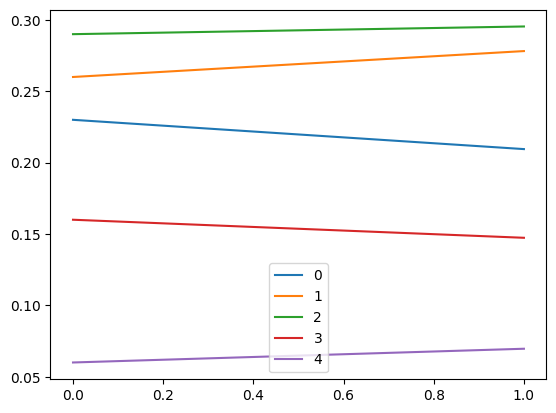

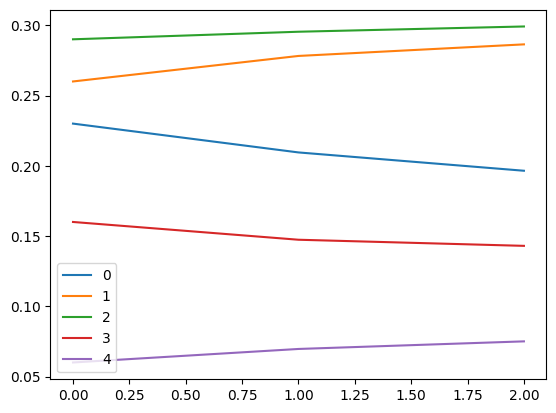

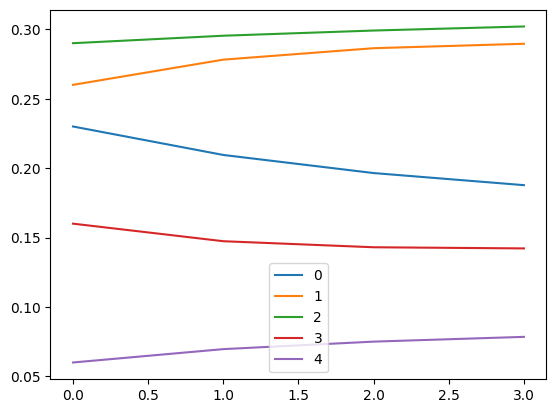

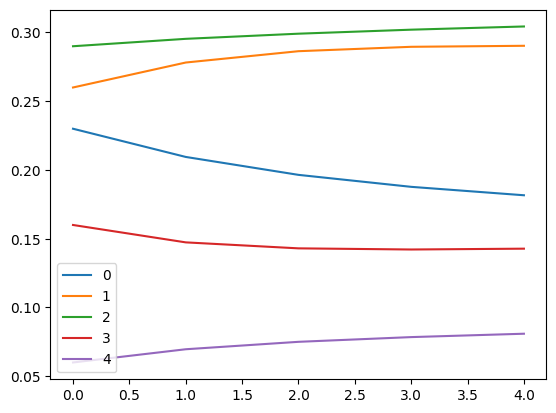

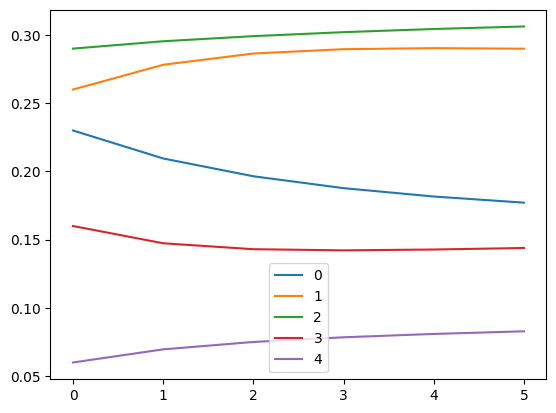

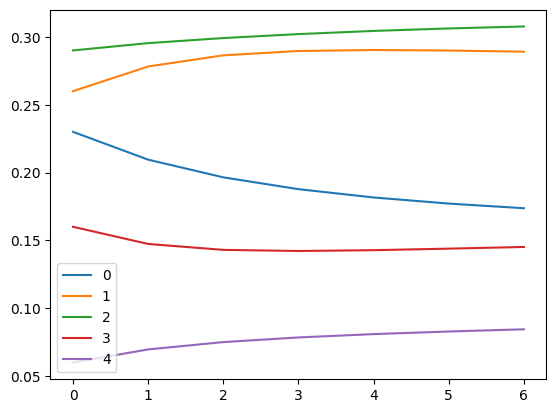

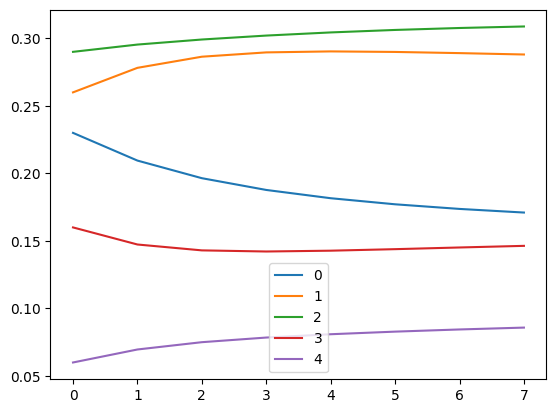

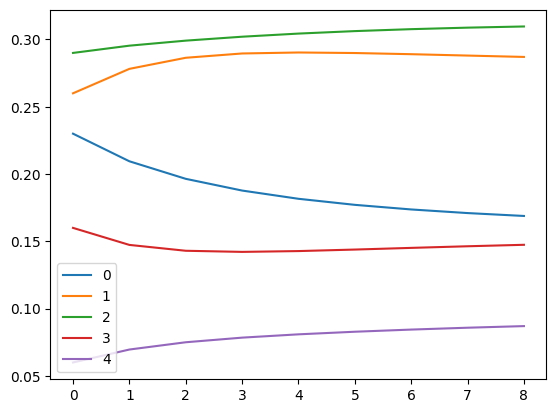

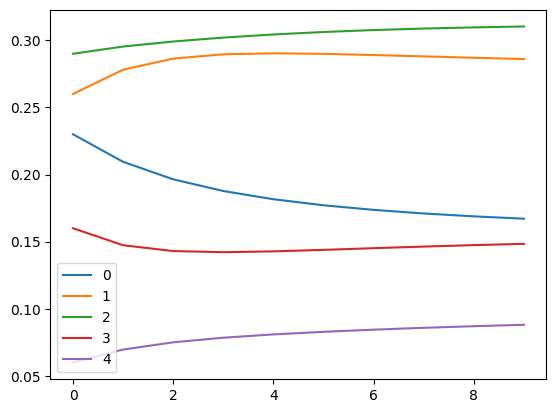

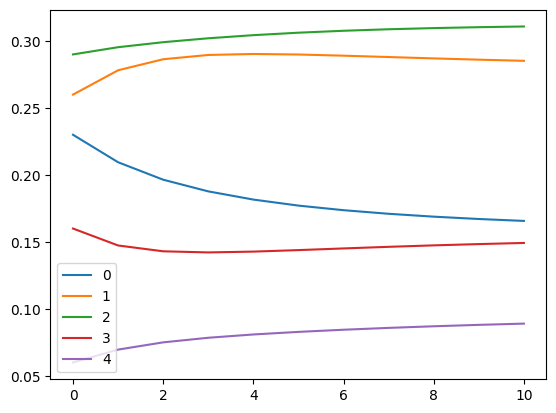

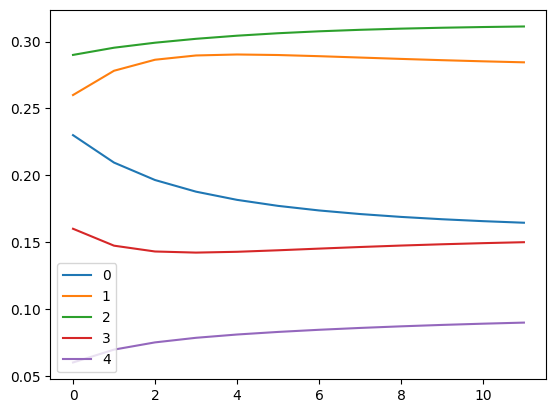

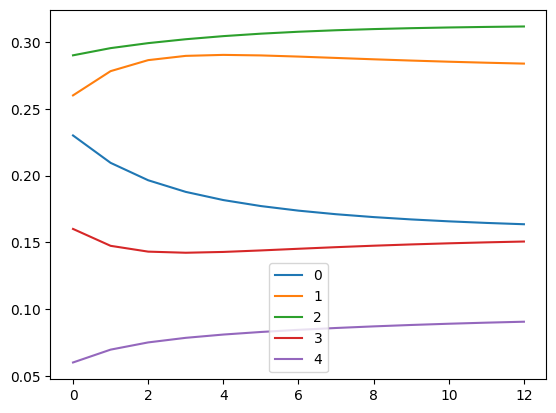

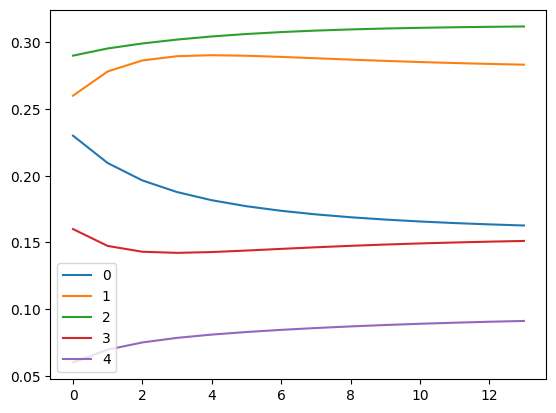

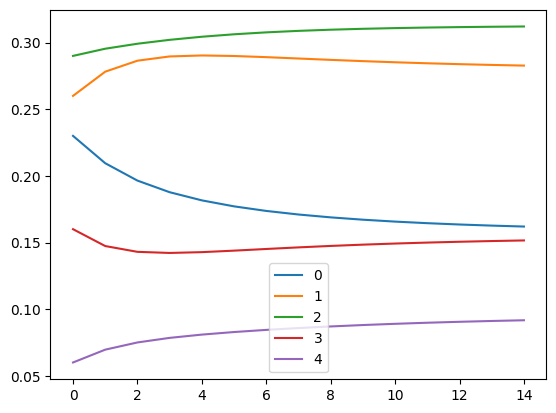

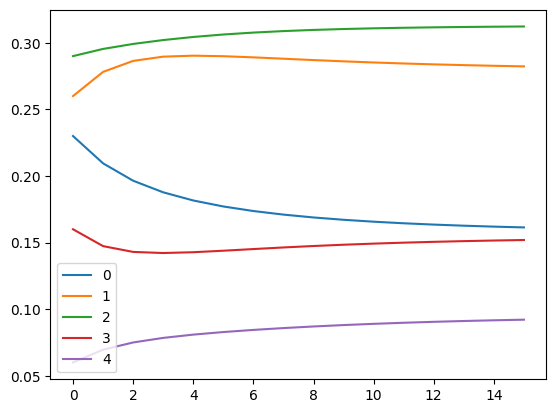

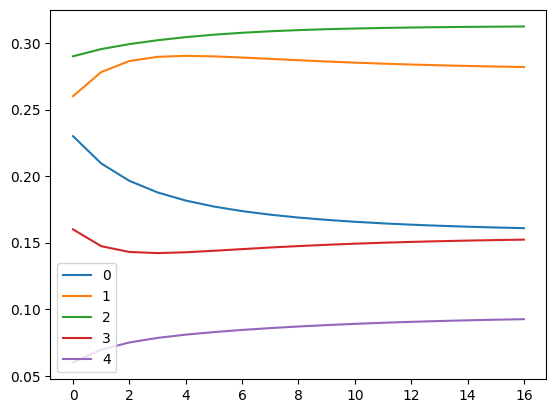

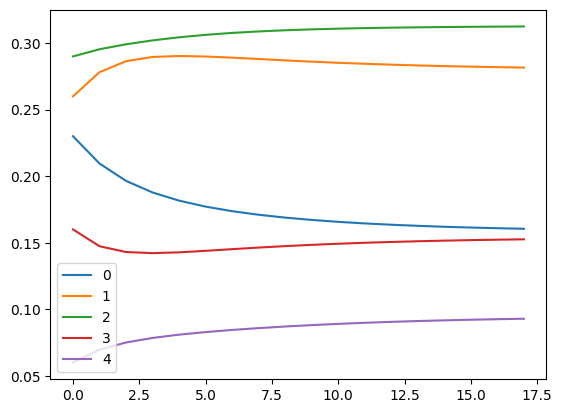

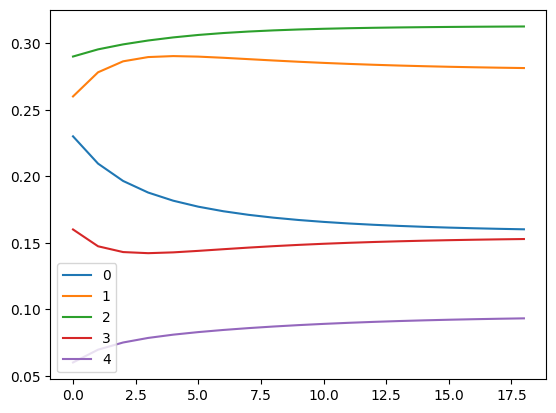

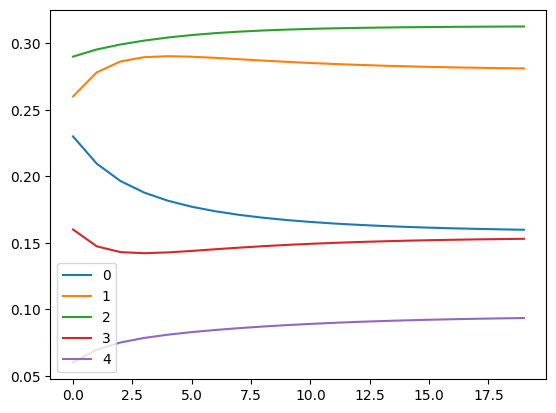

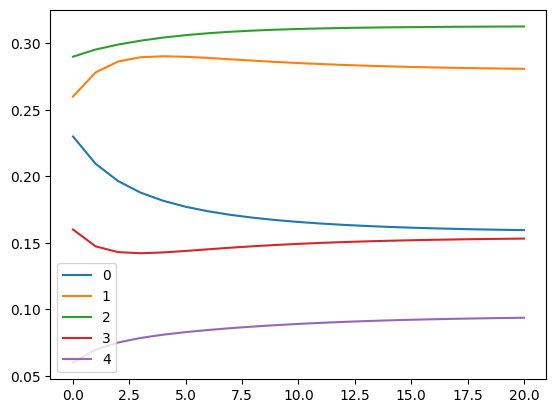

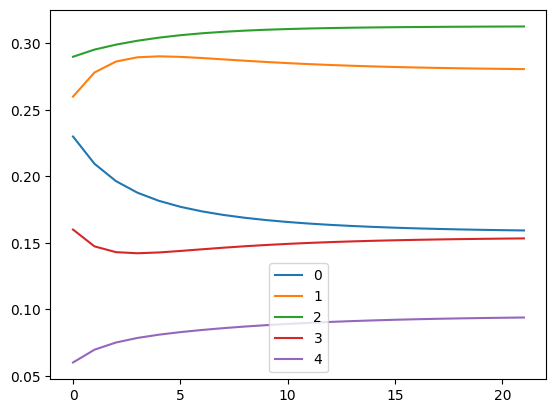

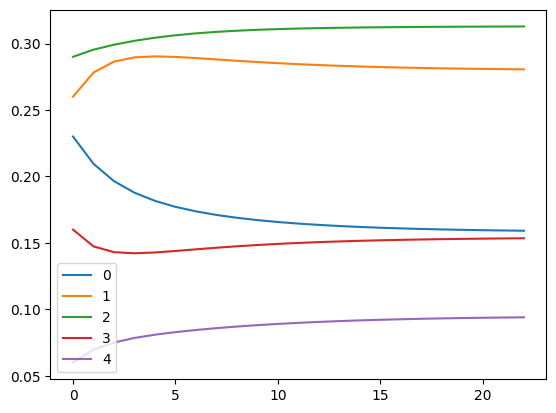

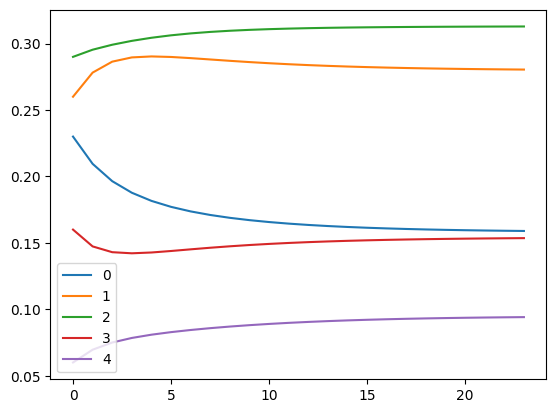

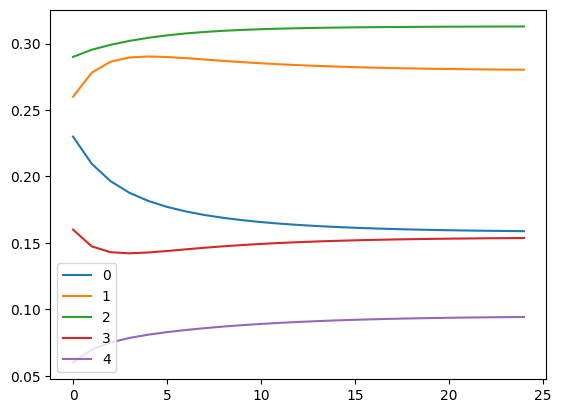

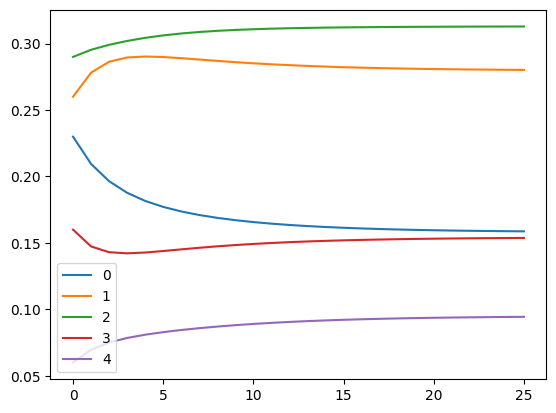

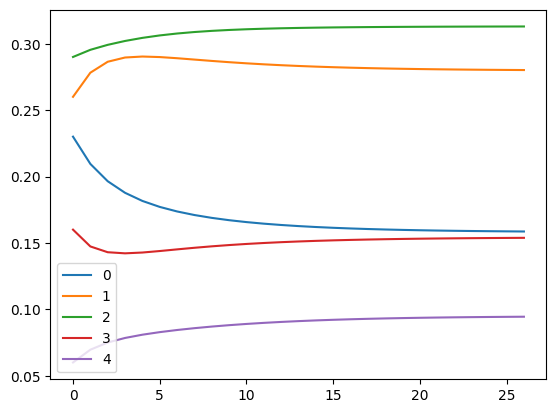

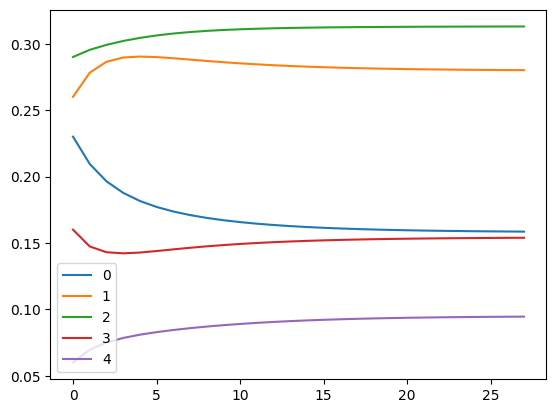

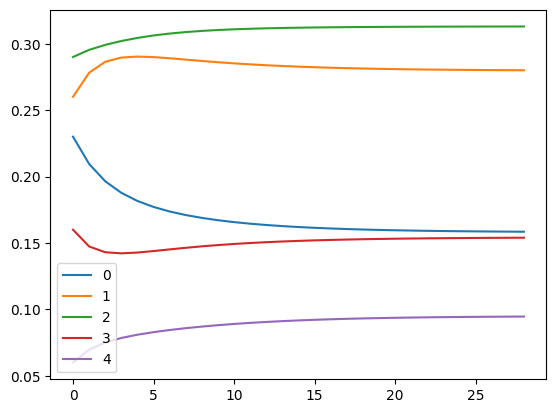

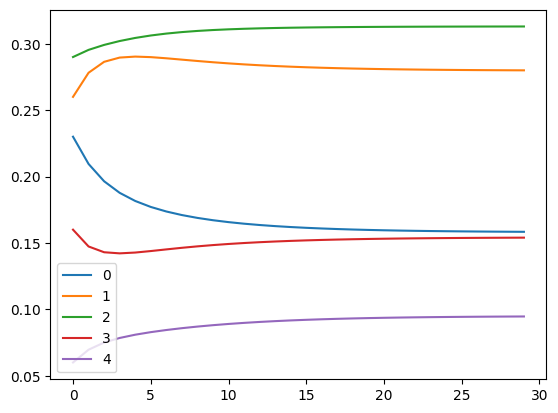

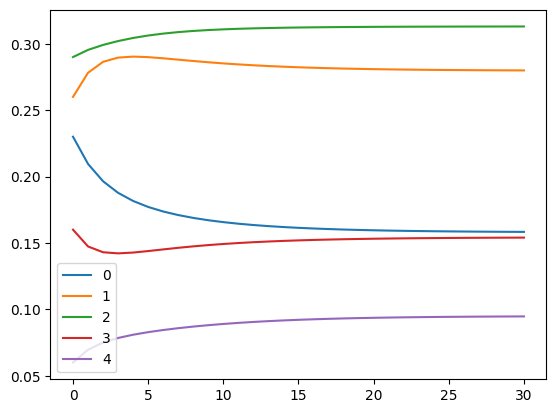

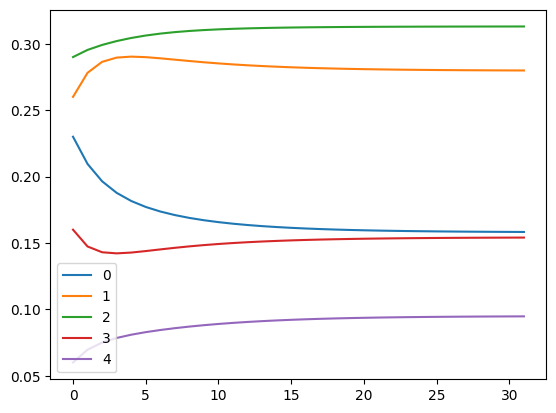

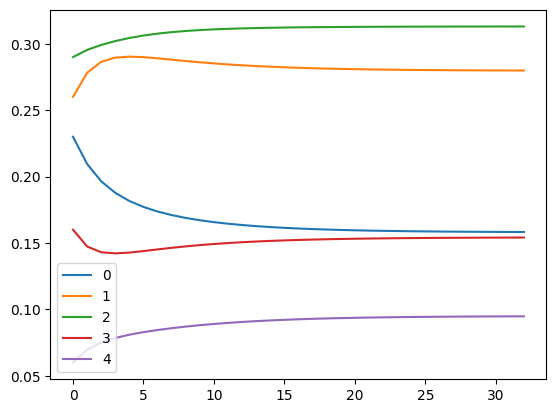

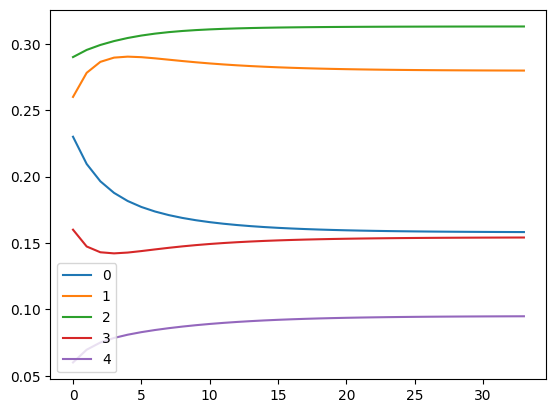

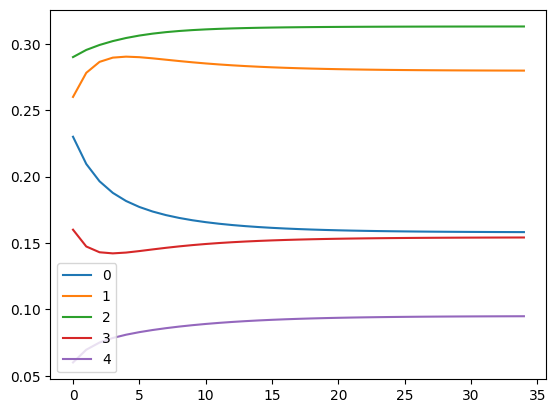

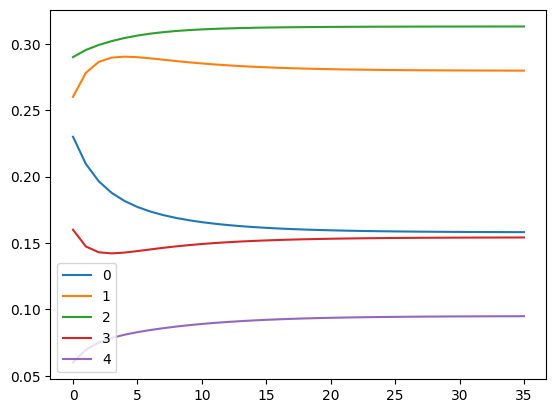

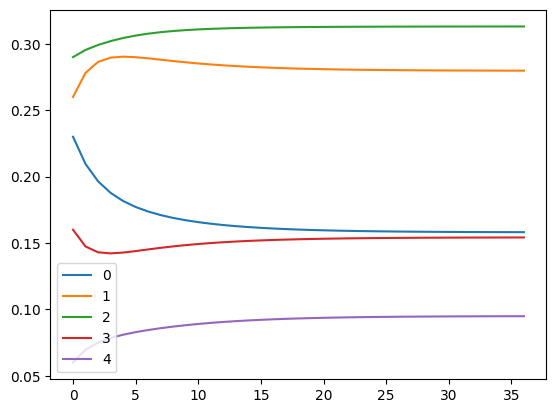

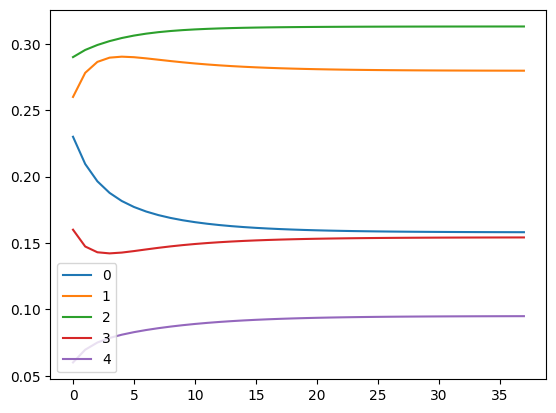

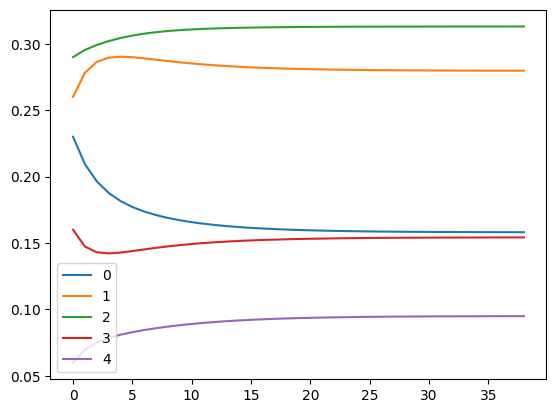

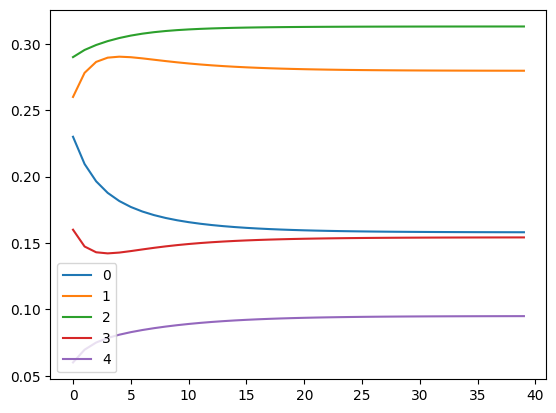

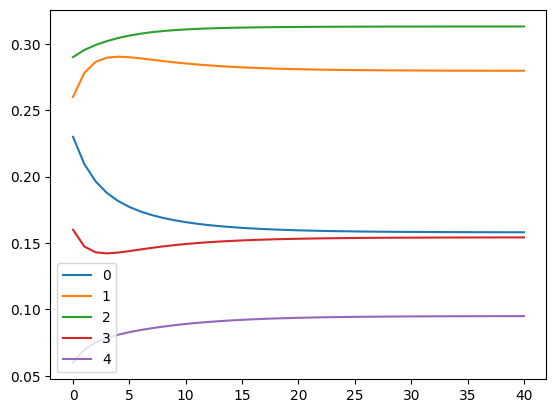

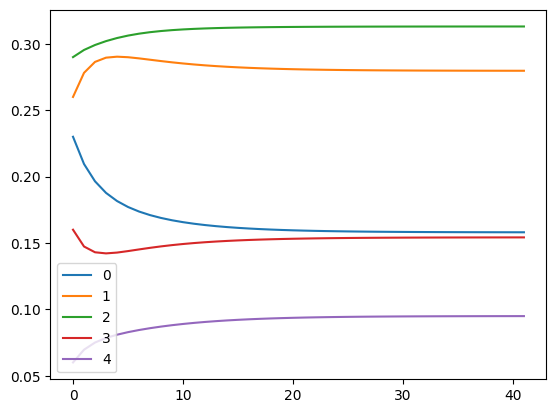

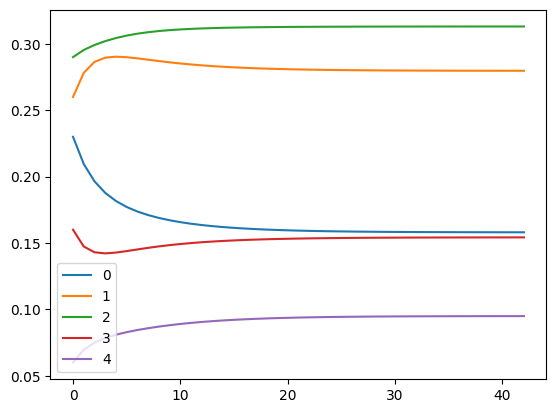

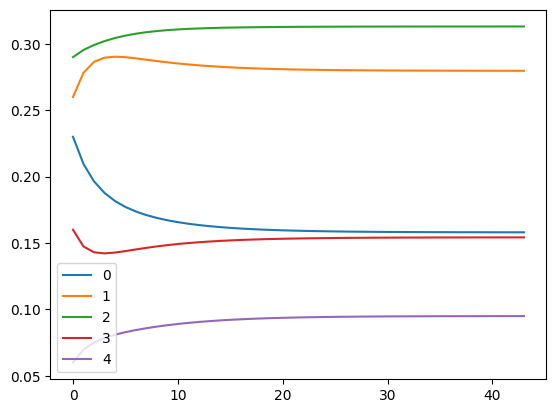

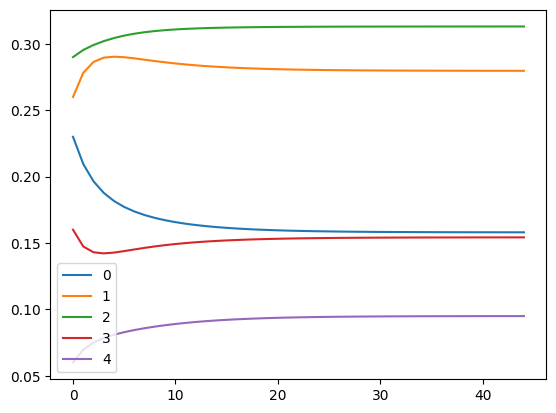

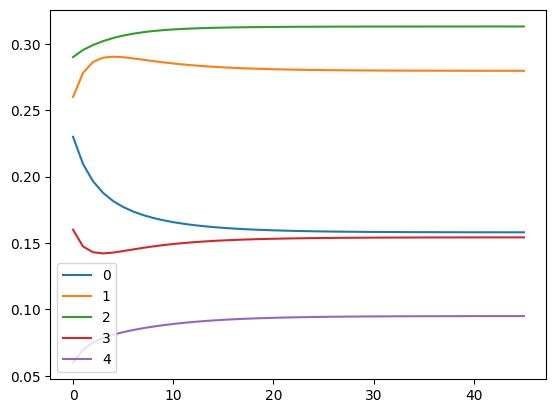

In [149]:
#We can also calculate the stationary distribution iteratively and graph the results to get the probabilities

#We need to use the final matrix in which the rows sum to 1 in order to correctly use eigenvalue decomposition
P = final_matrix_og

#initial state vector
state=np.array([[0.23, 0.26, 0.29, 0.16, 0.06]])
stateHist=state
dfStateHist=pd.DataFrame(state)

#for iterating for 45 intervals to represent the 45 years in our data
for x in range(45):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()

#final results
plt.show()

The stationary distribution obtained in the second method is approaching the values of the one calculated in the first cell of this section (stationary_distrib), confirming our computations as correct.

# **Graphing the Stationary/Equilibrium Distribution for Each Dataset's Matrix**

## **Amnesty International**

In [30]:
#Calculating the stationary distribution with linear algebra:

#transpose matrix so columns sum to 1 so we can calculate eigenvectors of stochastic rows
final_matrix_a_transp = final_matrix_a.T

#calculating eigenvectors of the stochastic rows
eigenvals, eigenvects = np.linalg.eig(final_matrix_a_transp)

#Now we find the indexes of the eigenvalues that are close to 1
#Use these values to select the target eigen vectors and flatten the result
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]

# Turn the eigenvector elements into probabilites
stationary_distrib_a = target_eigenvect / sum(target_eigenvect)

#Final stationary distribution, which sums to 1
stationary_distrib_a 

array([0.16621093, 0.28496106, 0.28423949, 0.16948412, 0.0951044 ])

[[0.15487982 0.24688803 0.28763307 0.22487072 0.08572836]]
[[0.15305273 0.25964931 0.29043665 0.20050233 0.09635899]]
[[0.1531351  0.26775845 0.28962427 0.18899549 0.10048669]]
[[0.15412353 0.27267468 0.28832307 0.18309769 0.10178103]]
[[0.15544297 0.27568755 0.28725321 0.1797656  0.10185067]]
[[0.15680335 0.27762207 0.28648399 0.1776757  0.10141489]]
[[0.15807497 0.27894905 0.28594668 0.17623082 0.10079847]]
[[0.15921038 0.27992395 0.2855678  0.17515054 0.10014732]]
[[0.16020121 0.28068301 0.28529407 0.17429684 0.09952486]]
[[0.16105602 0.28129942 0.28509069 0.17359767 0.0989562 ]]
[[0.16178946 0.28181382 0.28493556 0.17301253 0.09844863]]
[[0.16241734 0.28225013 0.28481455 0.1725166  0.09800139]]
[[0.16295453 0.28262359 0.28471839 0.17209322 0.09761026]]
[[0.16341426 0.2829448  0.28464085 0.17173032 0.09726977]]
[[0.16380794 0.28322173 0.28457758 0.17141853 0.09697423]]
[[0.16414531 0.28346073 0.28452544 0.17115032 0.0967182 ]]
[[0.16443466 0.28366706 0.28448215 0.17091943 0.09649669

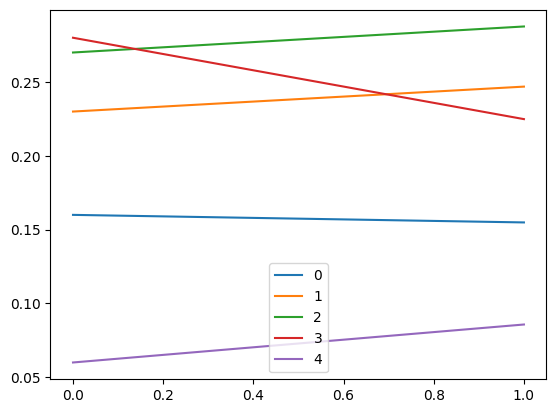

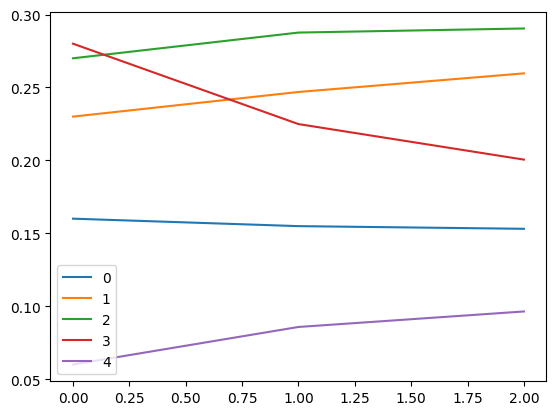

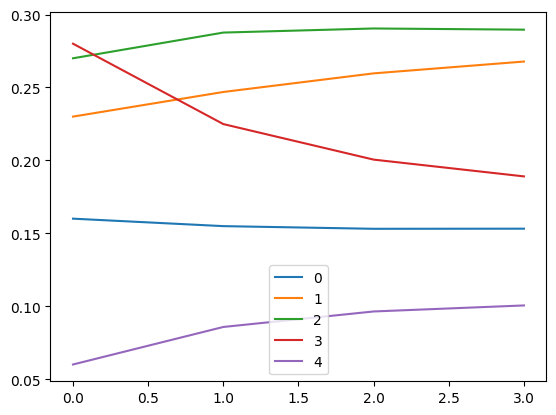

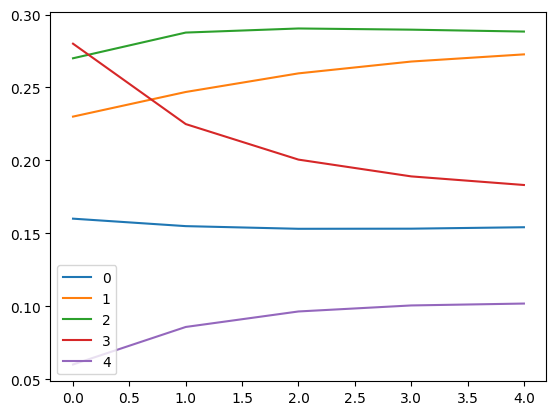

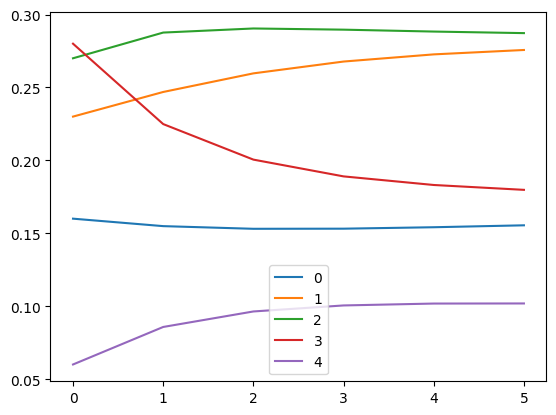

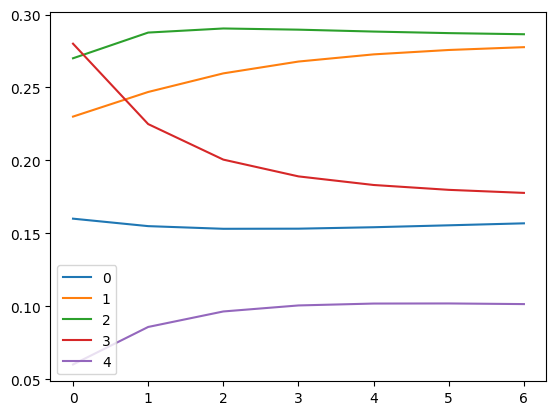

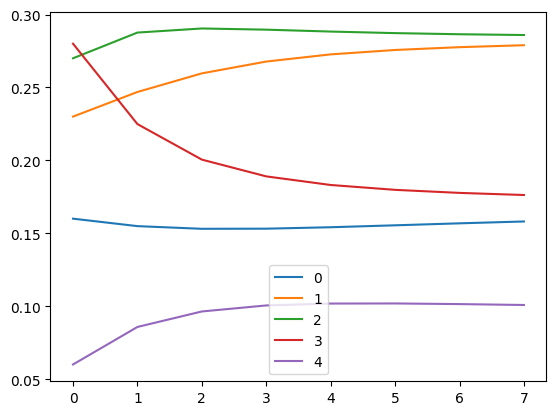

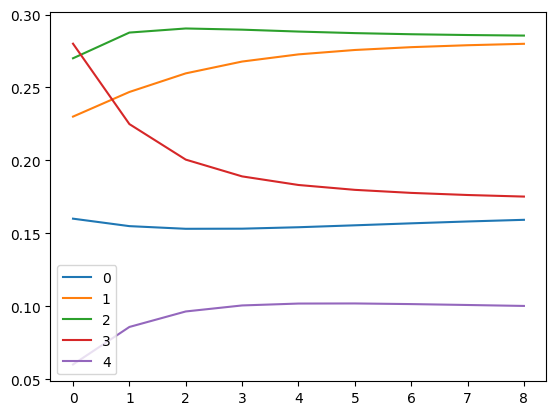

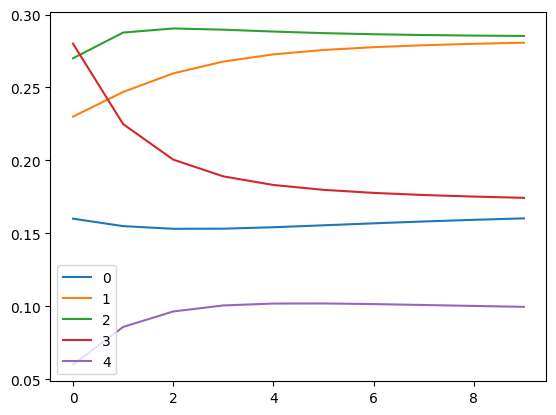

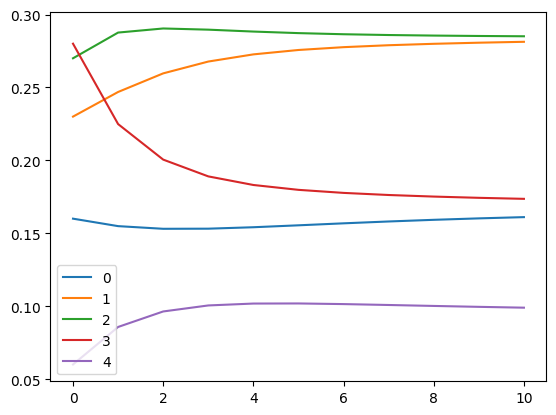

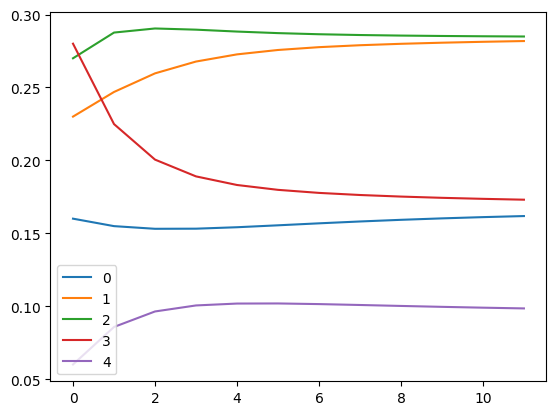

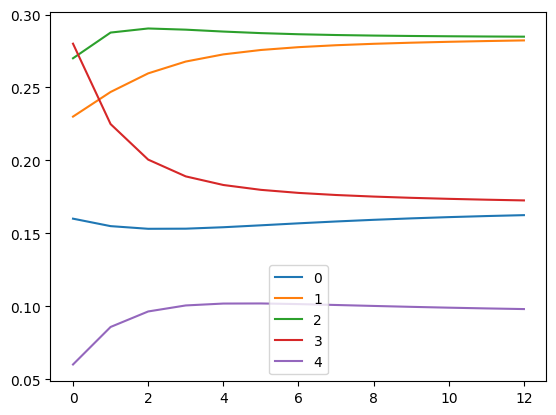

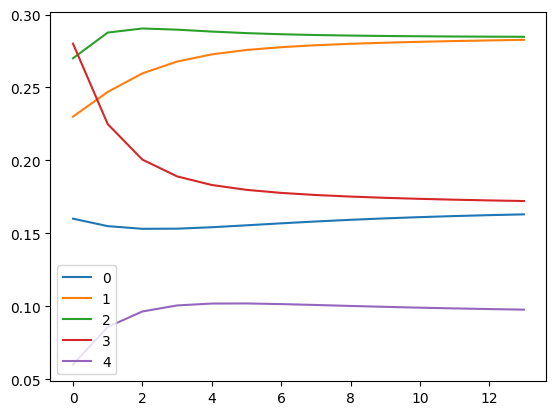

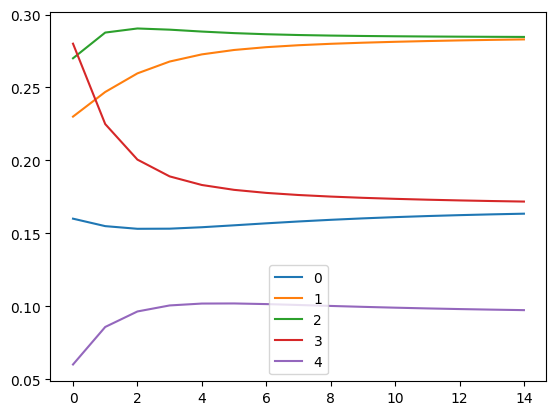

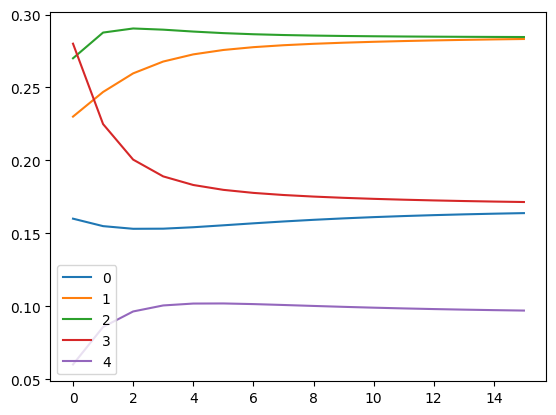

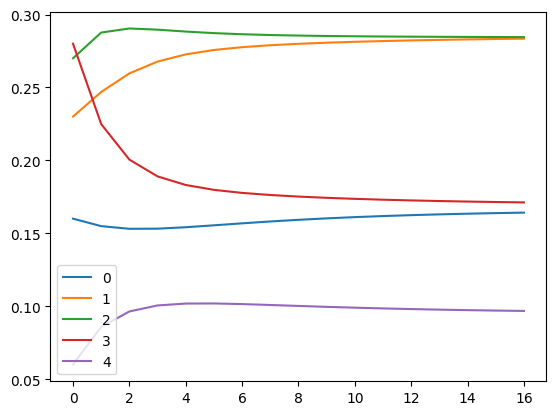

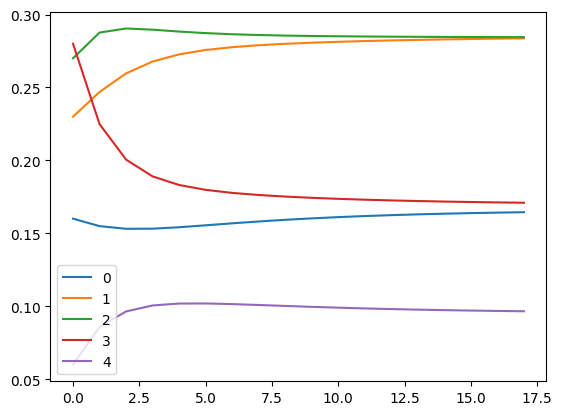

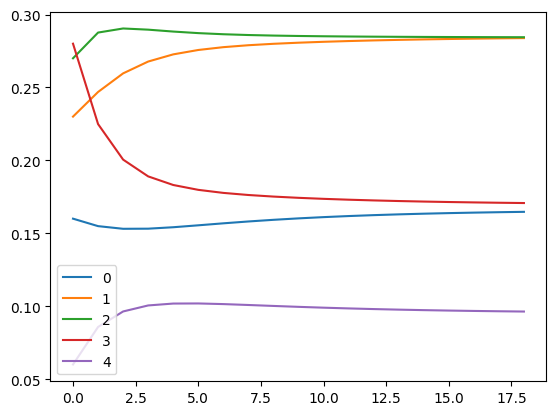

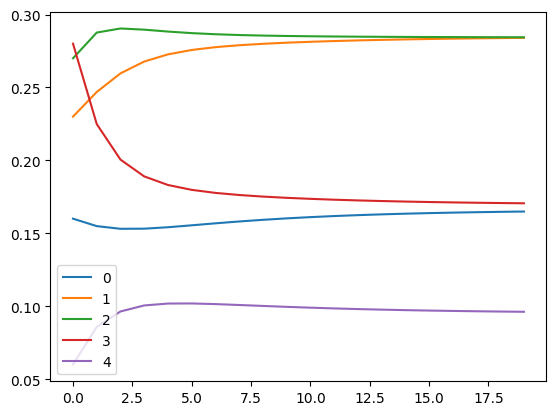

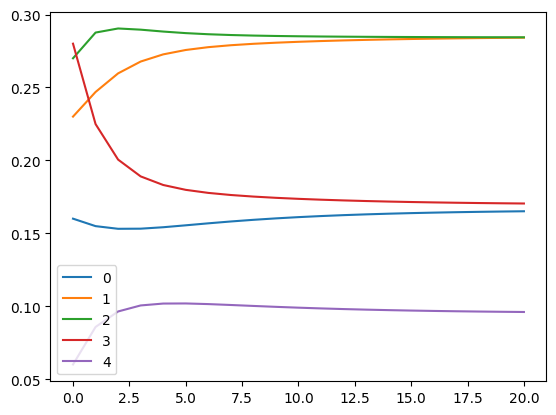

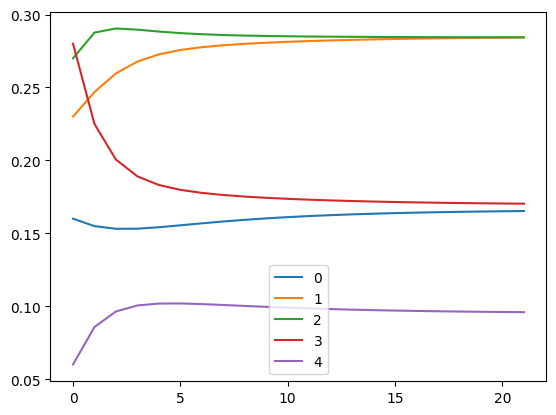

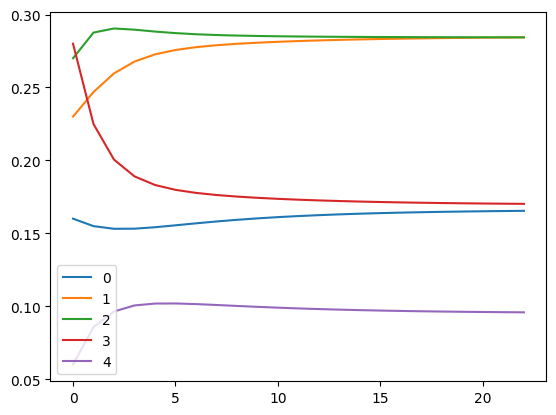

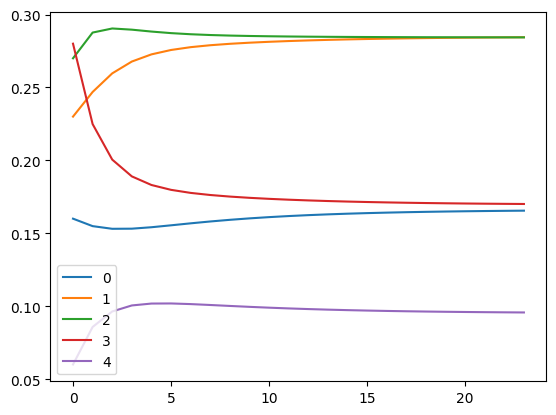

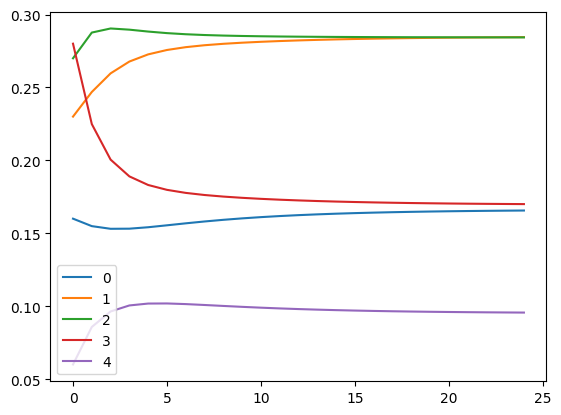

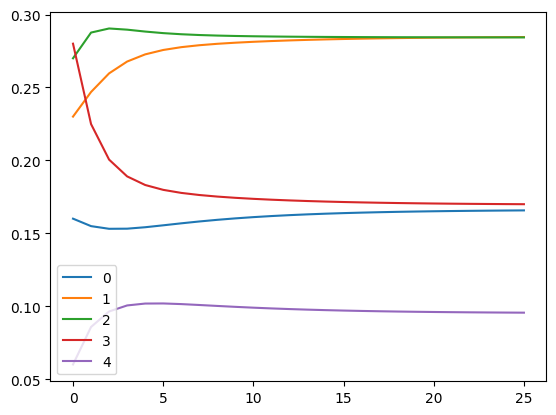

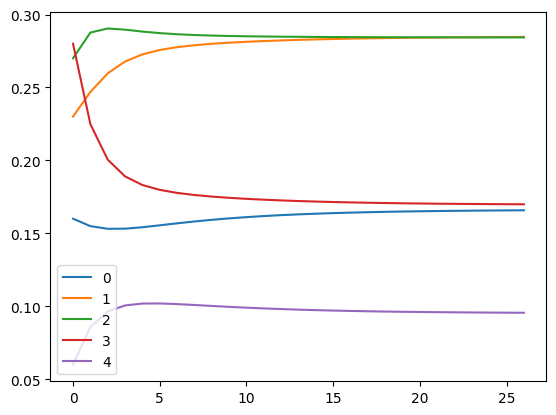

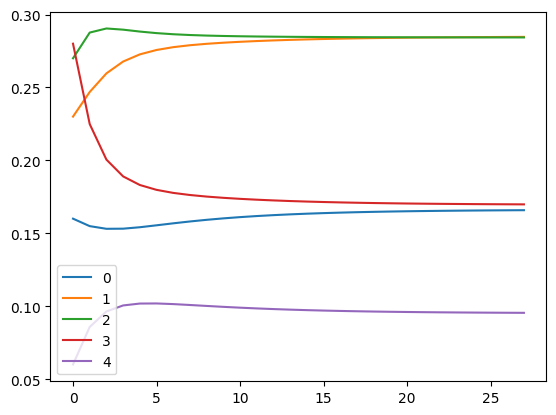

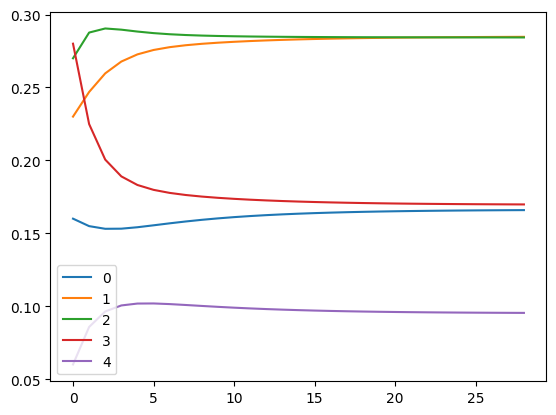

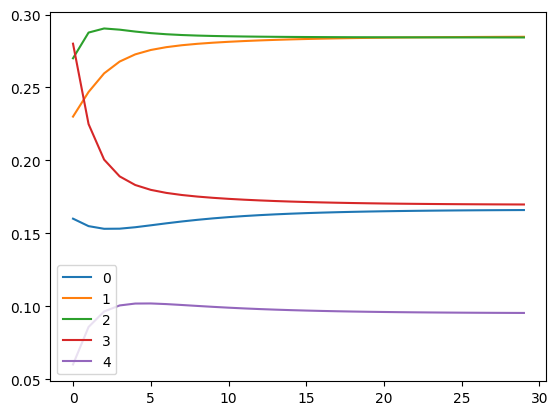

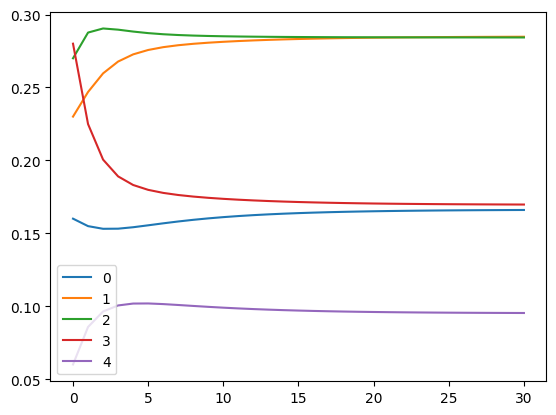

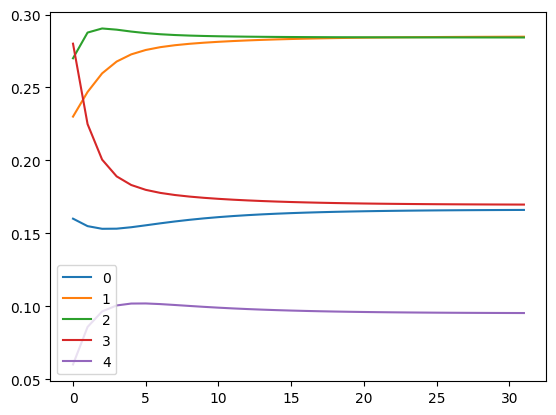

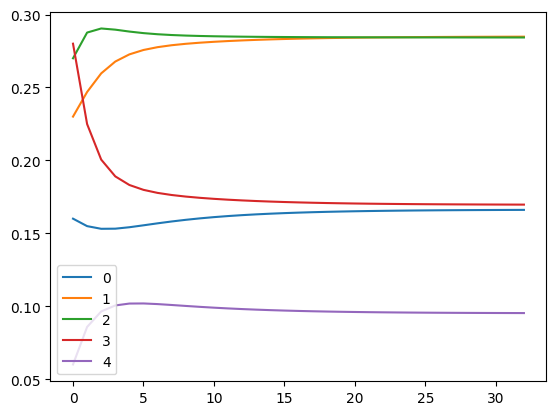

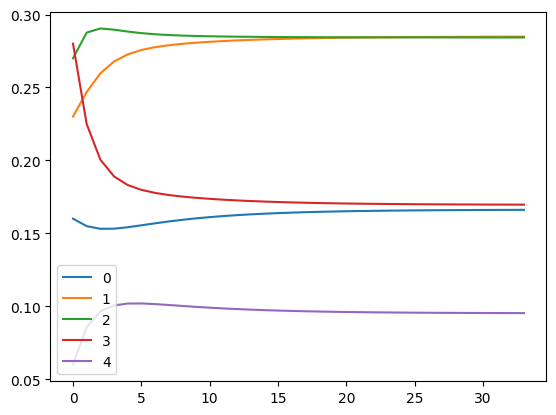

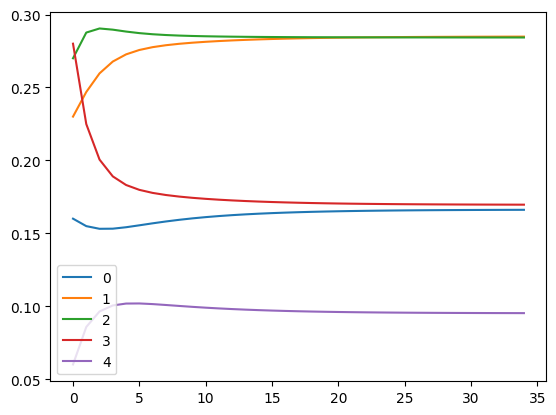

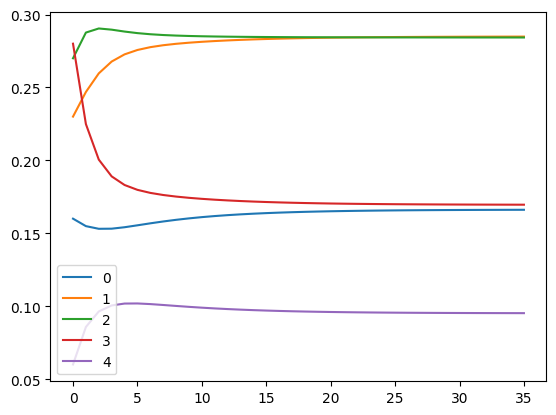

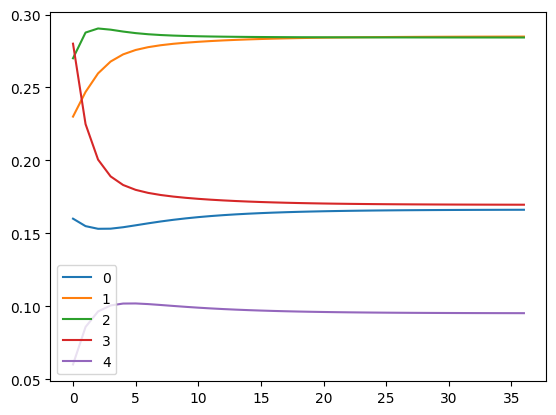

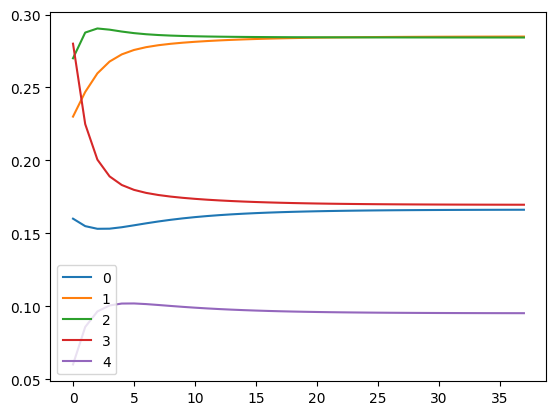

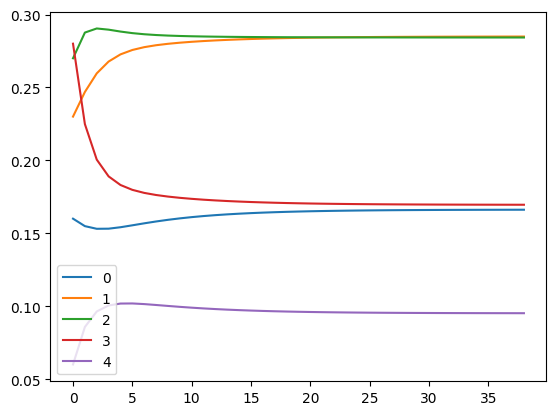

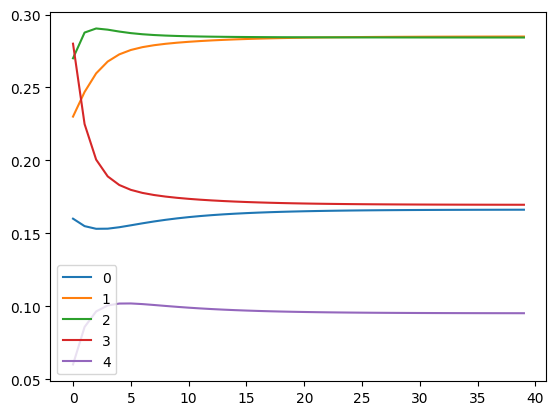

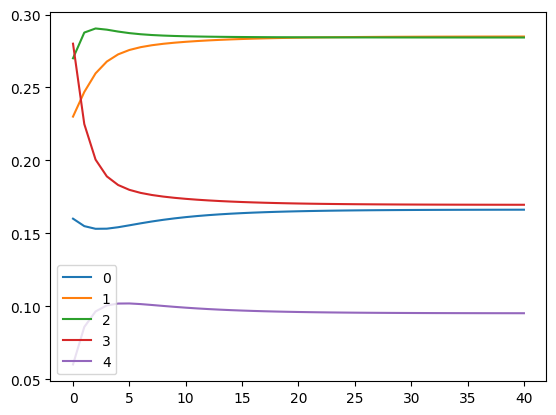

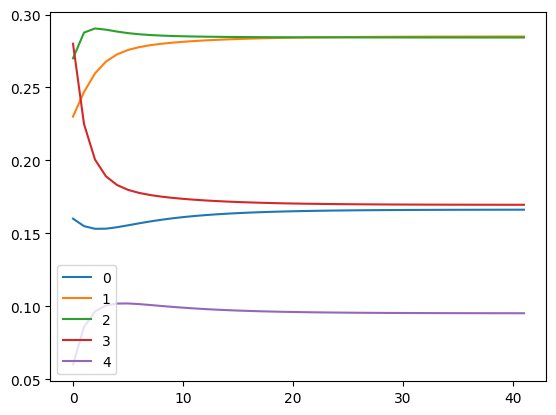

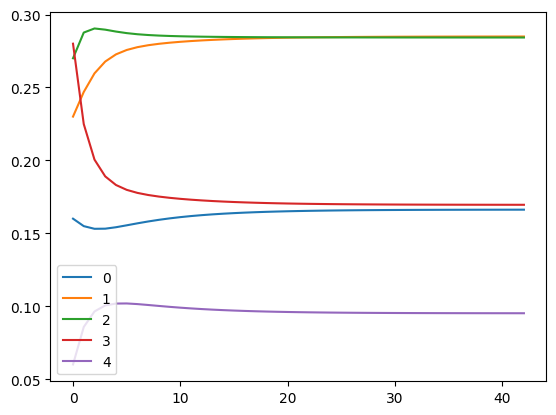

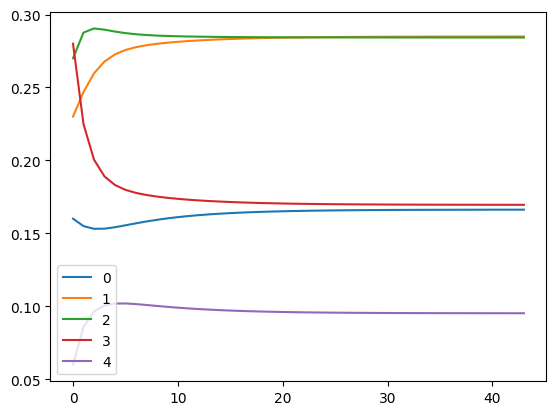

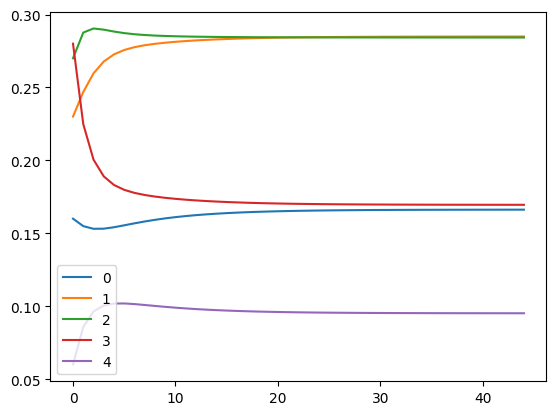

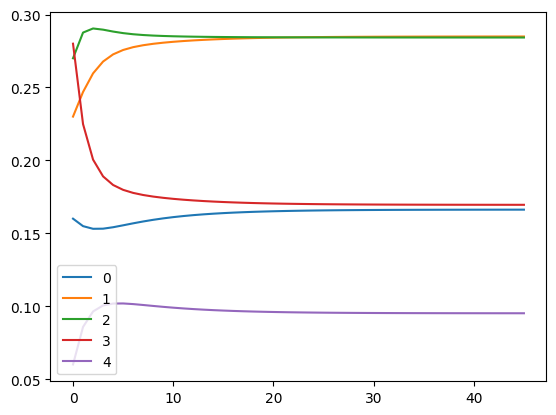

In [117]:
#Calculating stationary distribution iteratively and graphing results 

#Rows of this matrix sum to 1 so we can use eigenvalue decomposition
P = final_matrix_a

#initial state vector 
state=np.array([[0.16, 0.23, 0.27, 0.28, 0.06]])
stateHist=state
dfStateHist=pd.DataFrame(state)

#for iterating for 45 intervals to represent the 45 years in our data
for x in range(45):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()

#final results
plt.show()

The values for the stationary distribution obtained in the second method converge to the values of the one calculated in the first cell of this section (stationary_distrib_a), confirming our computations as correct.

## **Human Rights Watch**

In [103]:
#Calculating the stationary distribution with linear algebra:

#transpose matrix so columns sum to 1 so we can calculate eigenvectors of stochastic rows
final_matrix_h_transp = final_matrix_h.T

#calculating eigenvectors of the stochastic rows
eigenvals, eigenvects = np.linalg.eig(final_matrix_h_transp)

#Now we find the indexes of the eigenvalues that are close to 1
#Use these values to select the target eigen vectors and flatten the result
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]

# Turn the eigenvector elements into probabilites
stationary_distrib_h = target_eigenvect / sum(target_eigenvect)

#Final stationary distribution, which sums to 1
stationary_distrib_h 

array([0.05433624, 0.17961645, 0.35922214, 0.24740358, 0.1594216 ])

[[0.11599702 0.22071681 0.36518341 0.19541697 0.10268579]]
[[0.09790546 0.22635663 0.36041067 0.2080121  0.10731514]]
[[0.08708974 0.22357346 0.36117219 0.21577769 0.11238691]]
[[0.07993949 0.21843084 0.36283941 0.22141854 0.11737172]]
[[0.07484528 0.21306773 0.36414069 0.22587153 0.12207477]]
[[0.071027   0.20817581 0.36487577 0.22949988 0.12642154]]
[[0.0680681  0.2039219  0.36513978 0.23248417 0.13038605]]
[[0.0657237  0.20029107 0.36507542 0.23494392 0.1339659 ]]
[[0.06383722 0.19721332 0.36480429 0.23697285 0.13717231]]
[[0.06230187 0.19460917 0.36441544 0.23864854 0.14002498]]
[[0.06104126 0.19240492 0.36396971 0.24003542 0.14254869]]
[[0.05999887 0.19053675 0.36350694 0.24118651 0.14477092]]
[[0.05913188 0.18895091 0.36305221 0.24214497 0.14672004]]
[[0.0584072  0.18760252 0.36262051 0.24294572 0.14842404]]
[[0.05779895 0.18645427 0.3622201  0.24361695 0.14990974]]
[[0.05728657 0.18547509 0.36185478 0.24418139 0.15120217]]
[[0.05685364 0.18463904 0.36152551 0.24465743 0.15232438

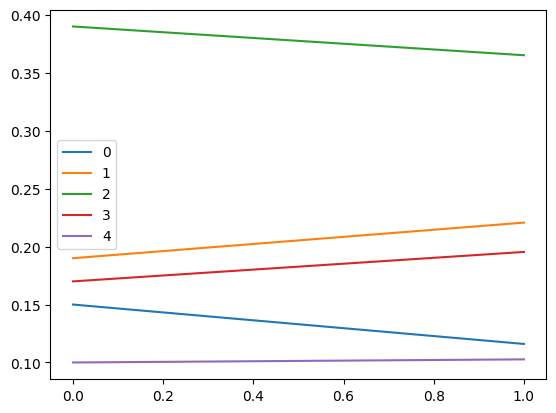

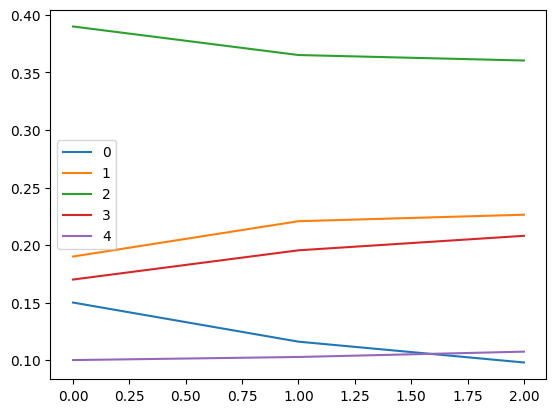

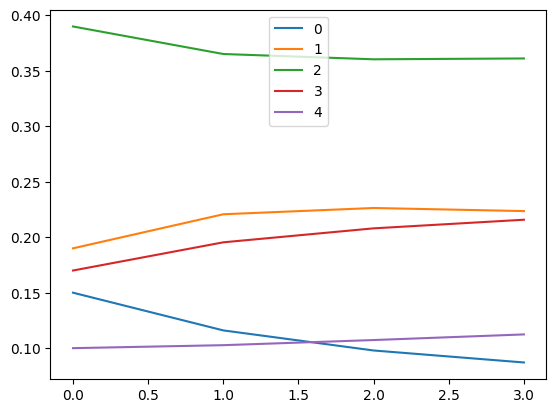

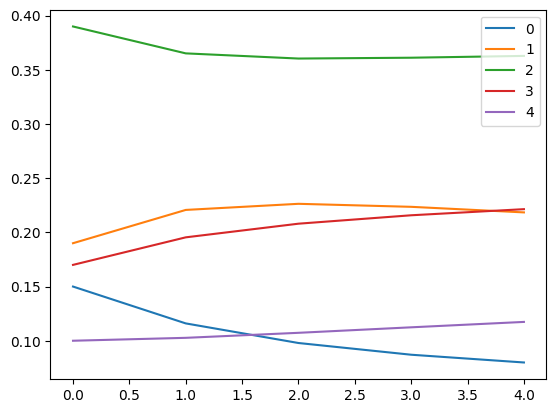

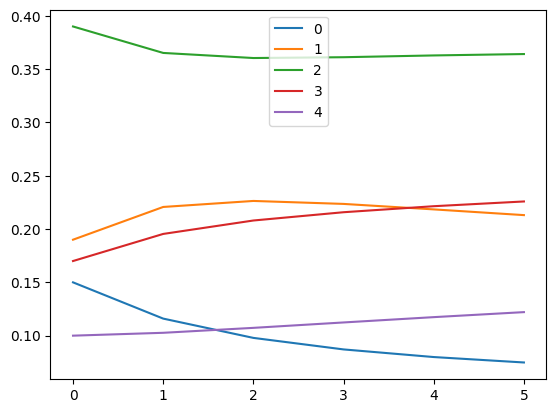

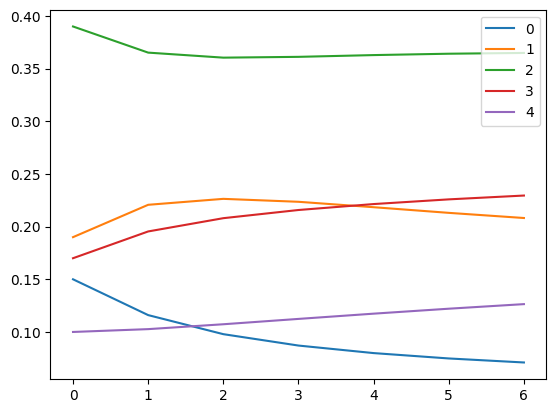

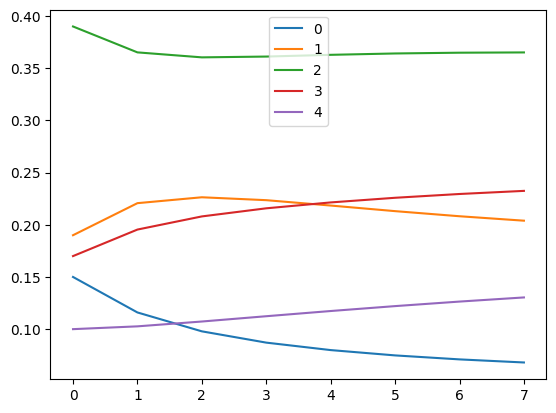

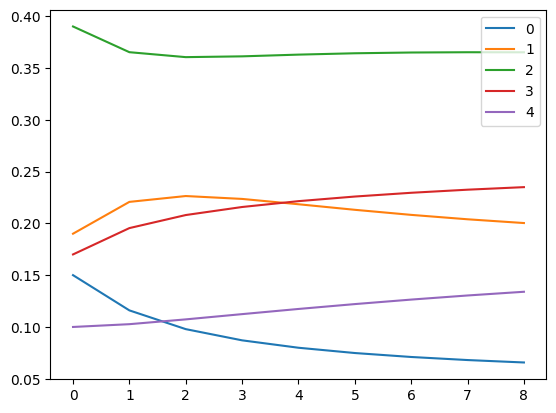

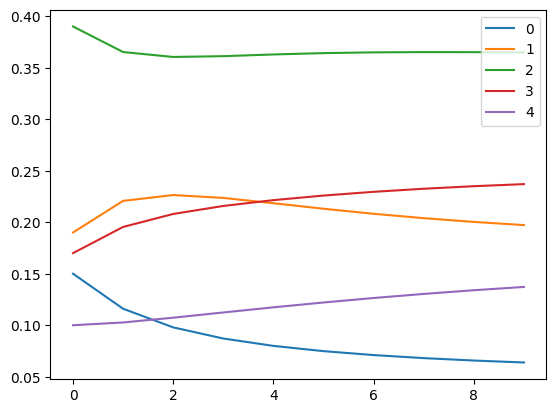

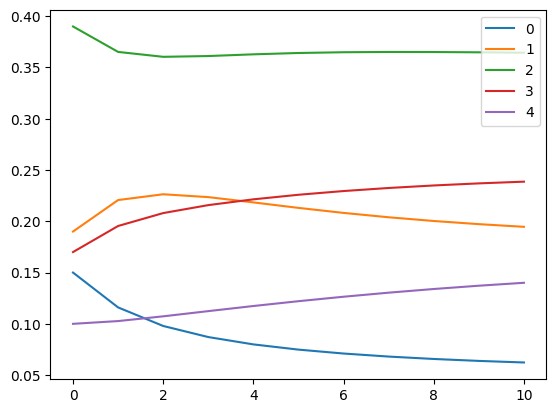

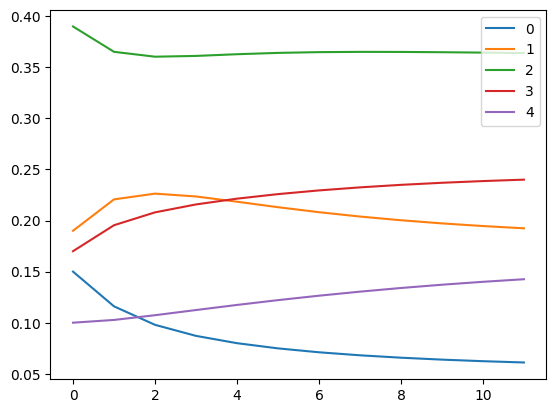

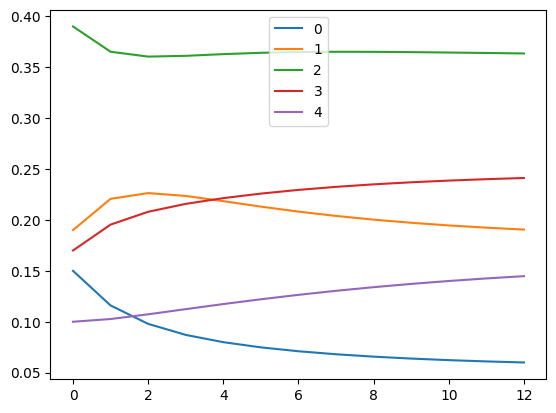

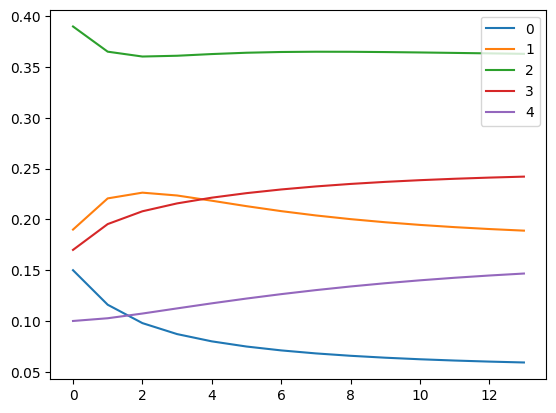

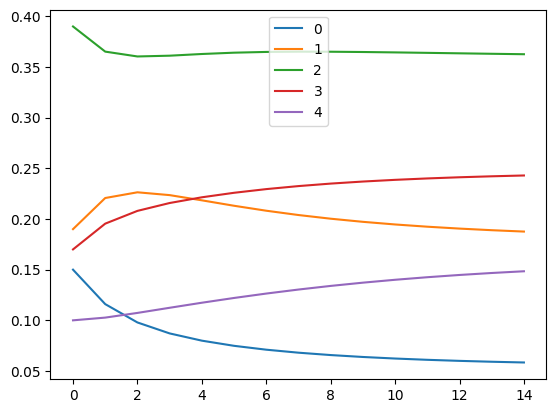

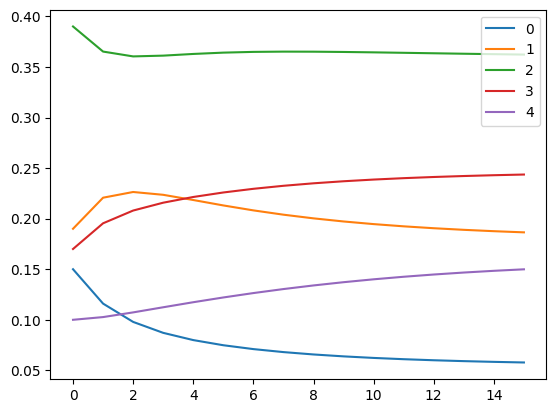

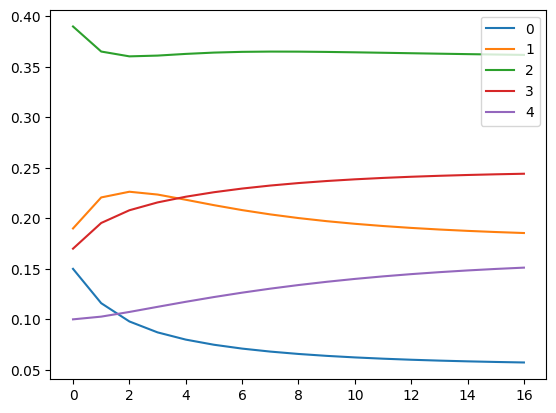

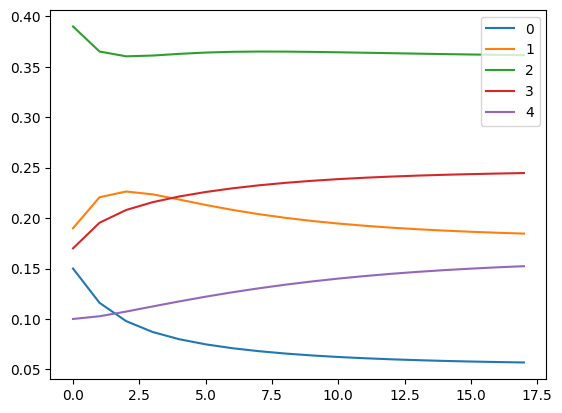

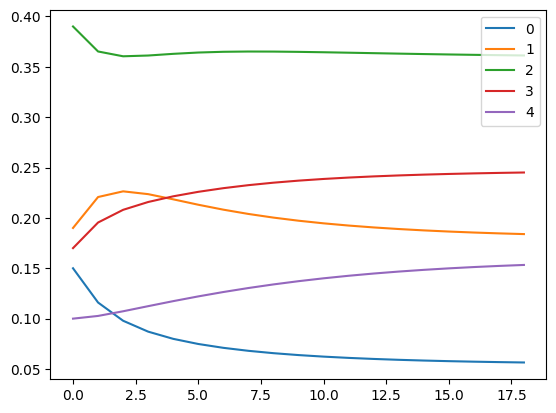

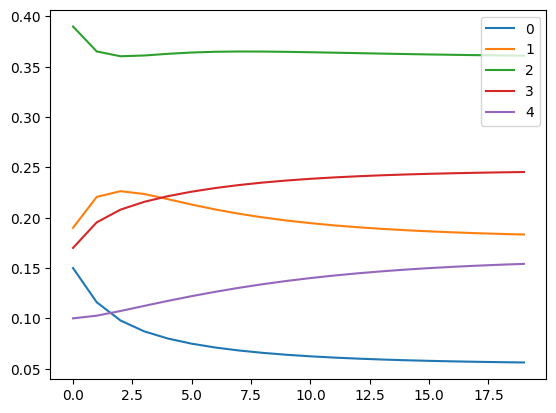

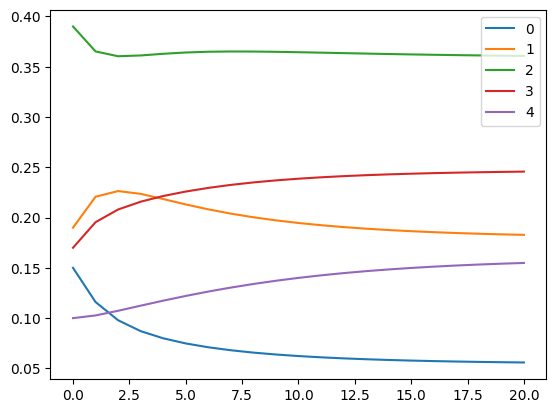

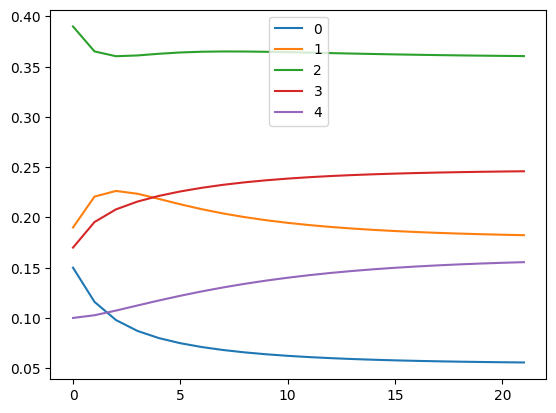

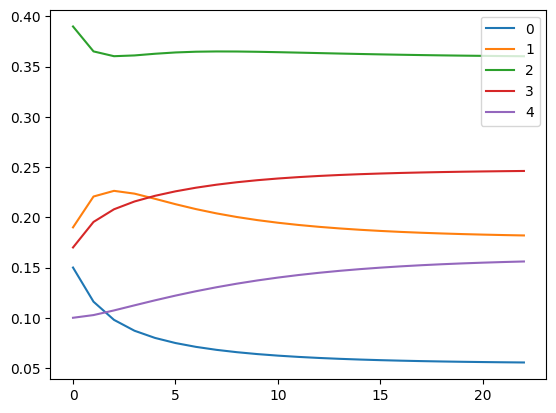

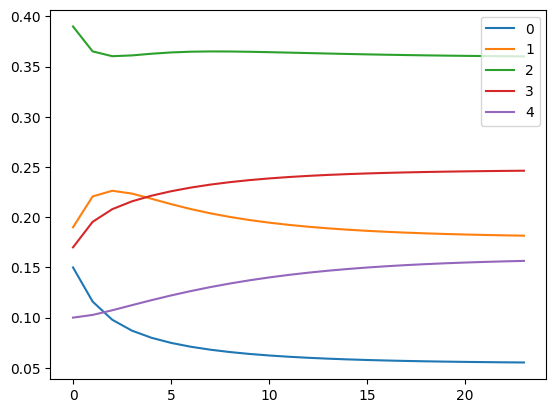

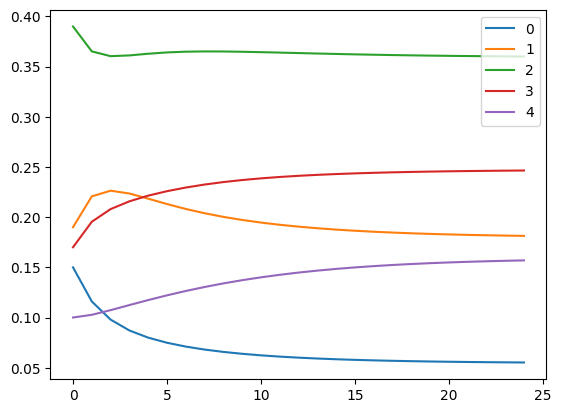

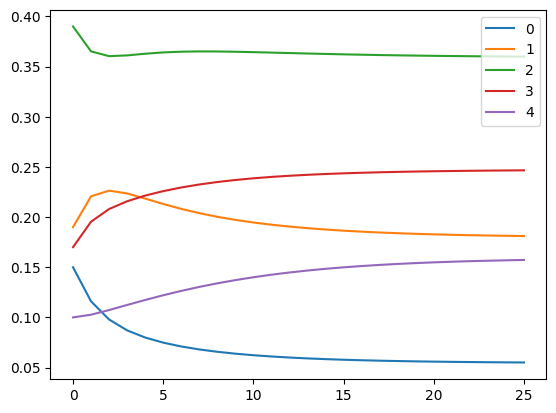

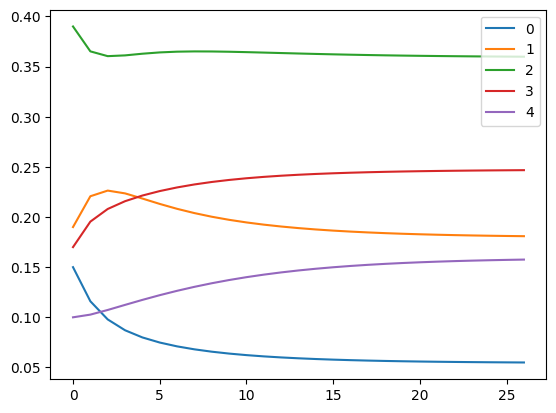

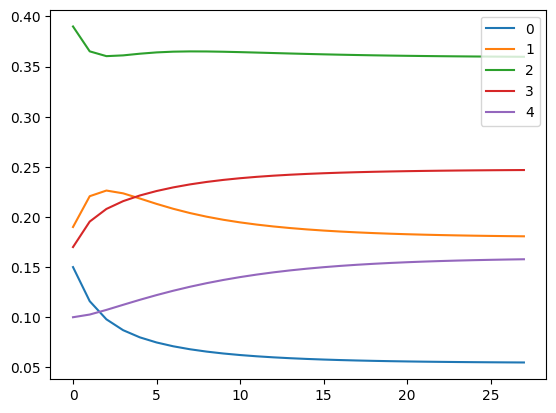

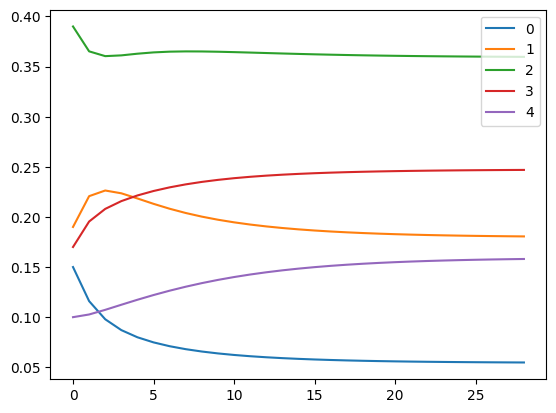

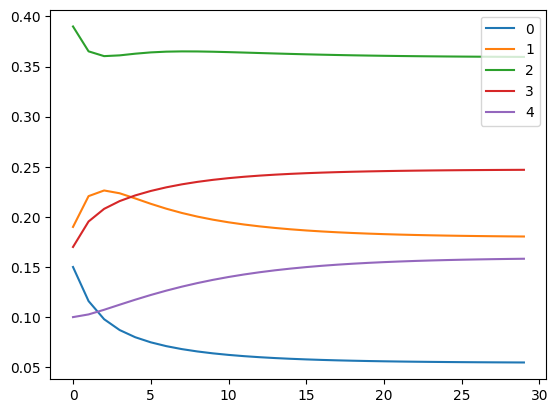

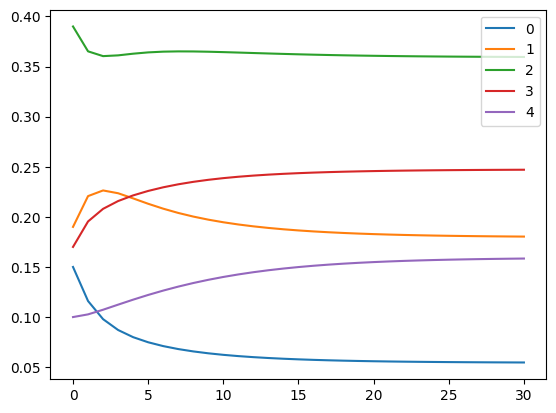

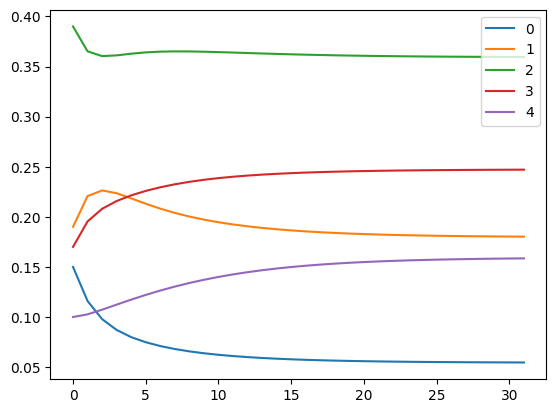

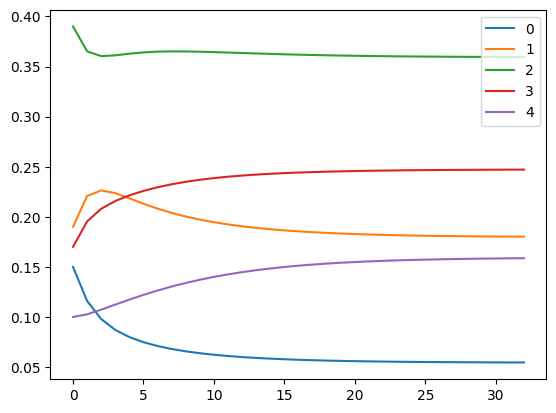

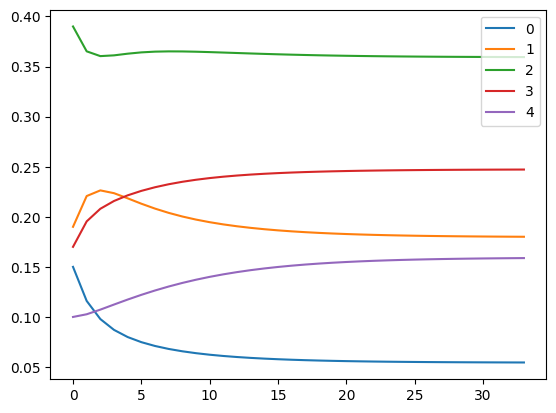

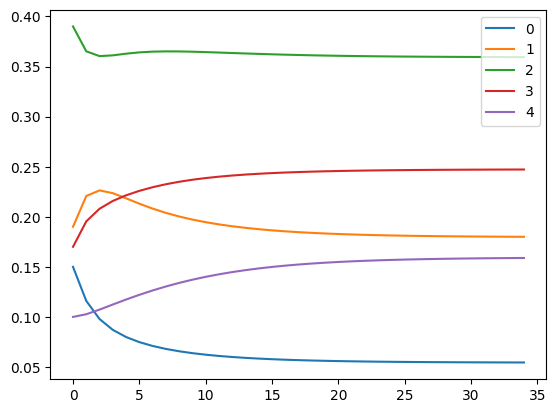

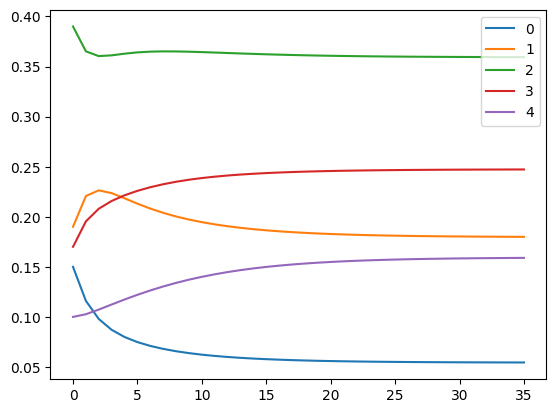

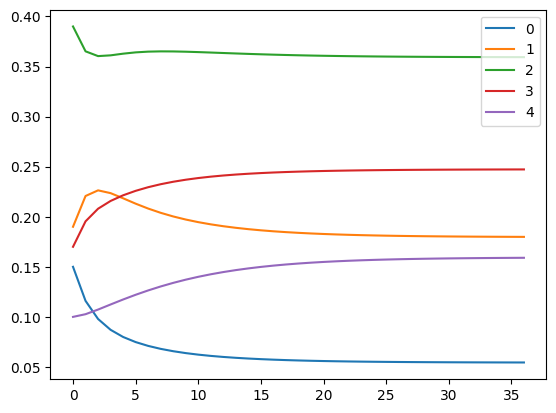

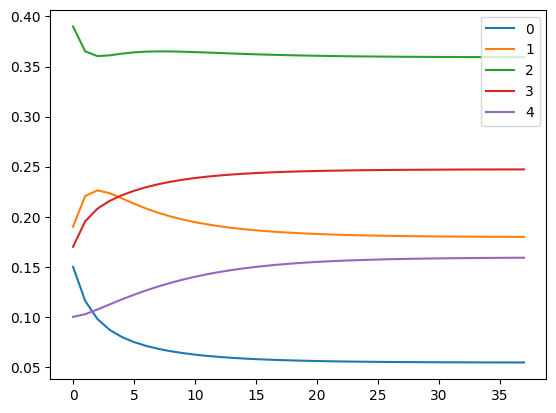

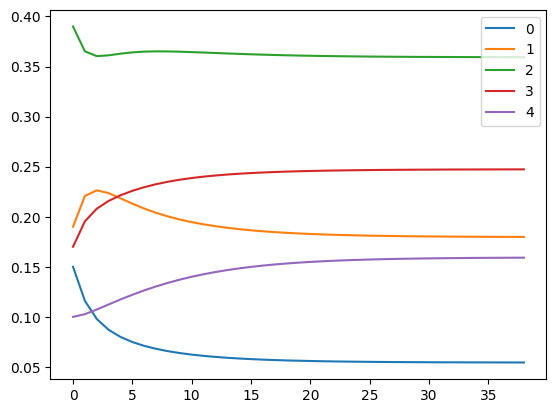

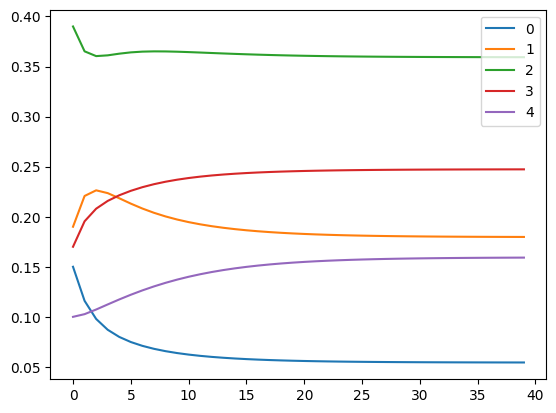

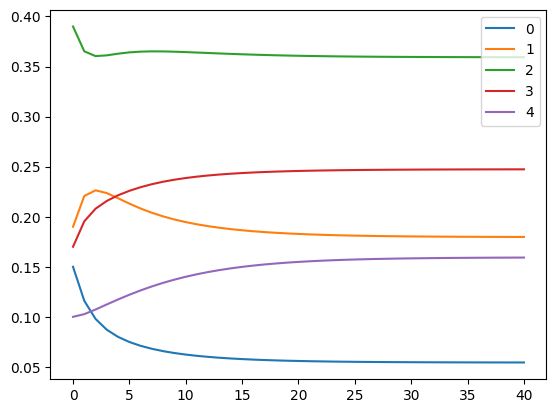

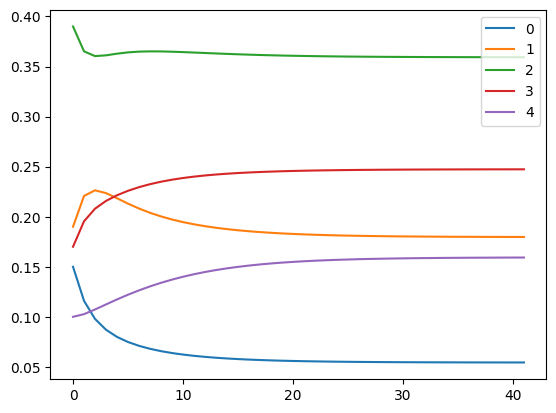

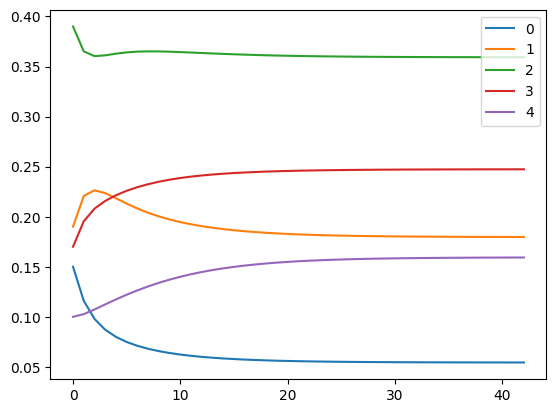

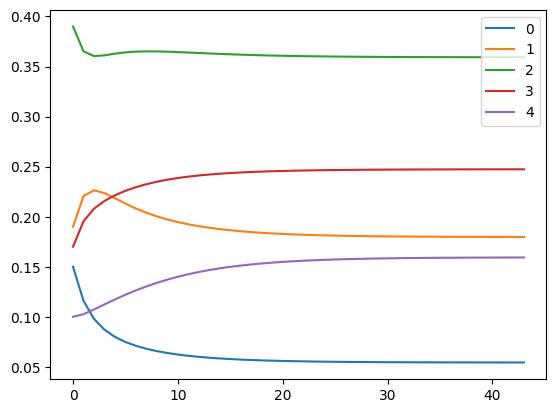

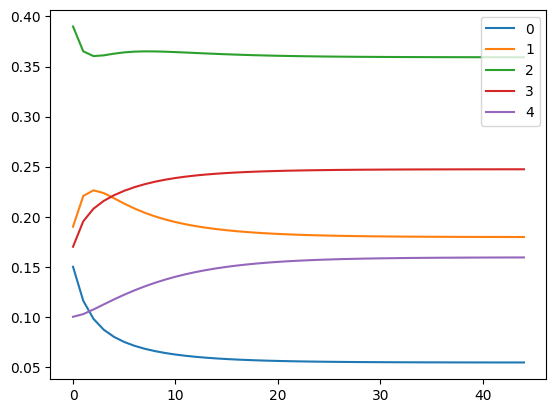

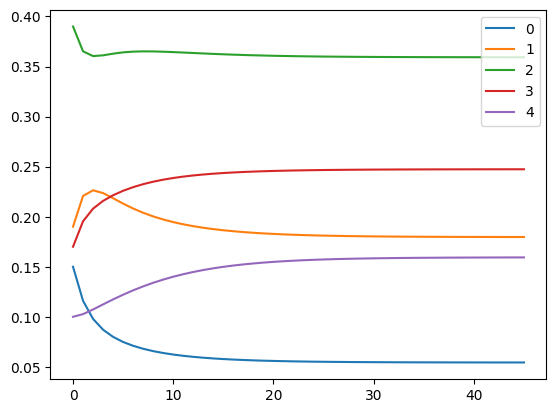

In [140]:
#Calculating stationary distribution iteratively and graphing results 

#Rows of this matrix sum to 1 so we can use eigenvalue decomposition
P = final_matrix_h

#initial state vector
state=np.array([[0.15, 0.19, 0.39, 0.17, 0.1]])
stateHist=state
dfStateHist=pd.DataFrame(state)

#for iterating for 45 intervals to represent the 45 years in our data
for x in range(45):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()

#final results
plt.show()

The values for the stationary distribution obtained in the second method converge the values of the one calculated in the first cell of this section (stationary_distrib_h), confirming our computations as correct.

## **U.S. State Department**

In [34]:
#Calculating the stationary distribution with linear algebra:

#transpose matrix so columns sum to 1 so we can calculate eigenvectors of stochastic rows
final_matrix_s_transp = final_matrix_s.T

#calculating eigenvectors of the stochastic rows
eigenvals, eigenvects = np.linalg.eig(final_matrix_s_transp)

#Now we find the indexes of the eigenvalues that are close to 1
#Use these values to select the target eigen vectors and flatten the result
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]

# Turn the eigenvector elements into probabilites
stationary_distrib_s = target_eigenvect / sum(target_eigenvect)

#Final stationary distribution, which sums to 1
stationary_distrib_s 

array([0.3473215 , 0.30347185, 0.23505696, 0.06869516, 0.04545452])

[[0.39112686 0.32878171 0.2100243  0.0508683  0.01919884]]
[[0.38856369 0.31972231 0.21607409 0.05162654 0.02401337]]
[[0.38489319 0.31488544 0.21887257 0.05384846 0.02750035]]
[[0.38098563 0.31190961 0.22079883 0.05598878 0.03031715]]
[[0.37718632 0.30991699 0.2224136  0.05782999 0.0326531 ]]
[[0.37364197 0.30850868 0.22385762 0.05938907 0.03460266]]
[[0.37041055 0.30747542 0.22516786 0.06071157 0.0362346 ]]
[[0.36750628 0.30669626 0.22635508 0.06183779 0.03760459]]
[[0.36492106 0.30609634 0.2274245  0.06279991 0.0387582 ]]
[[0.36263554 0.30562675 0.22838141 0.06362373 0.03973258]]
[[0.36062516 0.30525422 0.22923236 0.06433028 0.04055798]]
[[0.35886362 0.30495535 0.22998506 0.06493695 0.04125902]]
[[0.35732475 0.30471323 0.23064787 0.06545832 0.04185584]]
[[0.35598359 0.30451542 0.23122935 0.06590668 0.04236496]]
[[0.35481696 0.30435261 0.23173793 0.06629246 0.04280004]]
[[0.3538037  0.30421772 0.23218165 0.06662454 0.04317239]]
[[0.35292476 0.30410532 0.23256797 0.06691048 0.04349147

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


[[0.3493262  0.30368438 0.234162   0.06806314 0.04476428]]
[[0.34905132 0.30365448 0.23428447 0.06815015 0.04485957]]
[[0.34881401 0.30362889 0.23439028 0.06822517 0.04494166]]
[[0.34860916 0.30360695 0.23448166 0.06828986 0.04501238]]
[[0.34843236 0.30358812 0.23456056 0.06834563 0.04507333]]
[[0.34827979 0.30357195 0.23462867 0.06839373 0.04512585]]
[[0.34814814 0.30355806 0.23468747 0.06843521 0.04517112]]
[[0.34803455 0.30354611 0.23473821 0.06847097 0.04521015]]
[[0.34793656 0.30353584 0.23478199 0.06850182 0.0452438 ]]
[[0.34785202 0.30352699 0.23481977 0.06852842 0.04527281]]
[[0.34777909 0.30351937 0.23485236 0.06855136 0.04529782]]
[[0.34771618 0.30351281 0.23488048 0.06857114 0.04531938]]
[[0.34766191 0.30350716 0.23490474 0.0685882  0.04533798]]
[[0.34761511 0.30350229 0.23492567 0.06860291 0.04535402]]
[[0.34757473 0.3034981  0.23494372 0.0686156  0.04536785]]
[[0.34753991 0.30349448 0.23495929 0.06862655 0.04537977]]
[[0.34750987 0.30349136 0.23497272 0.06863599 0.04539005

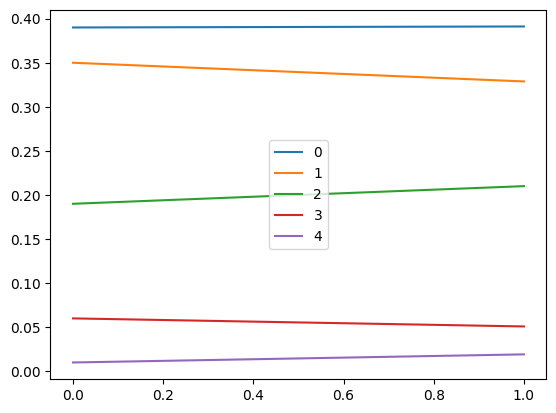

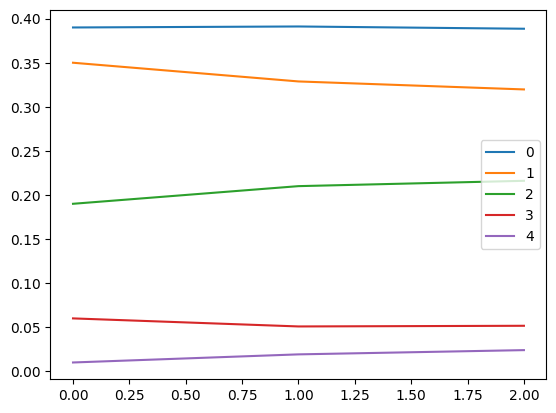

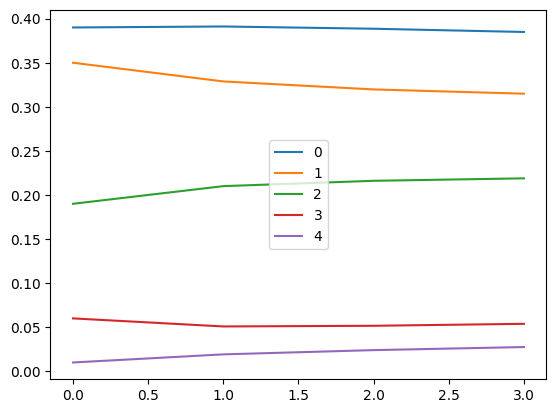

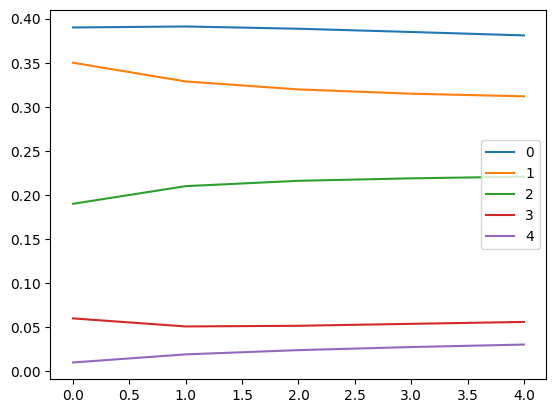

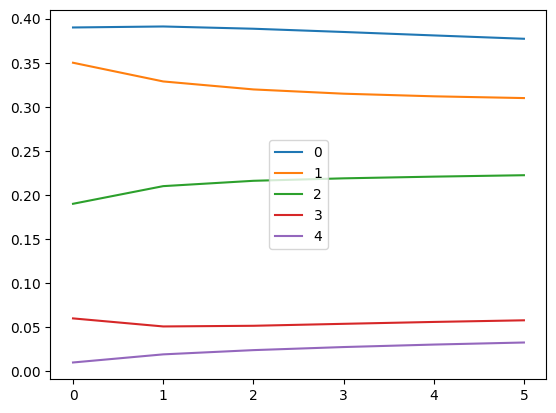

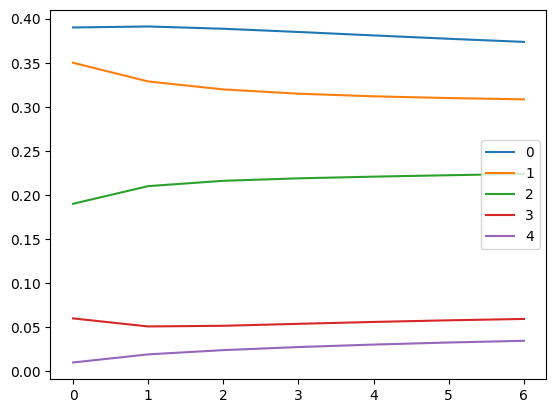

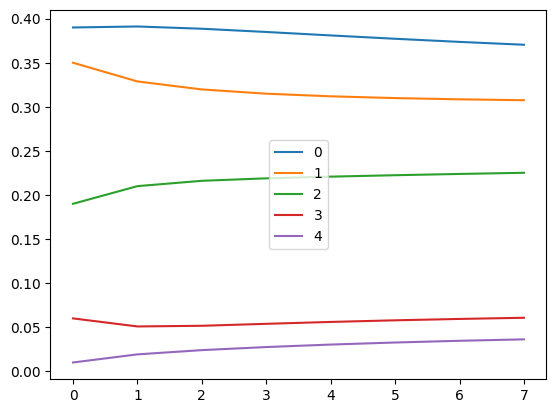

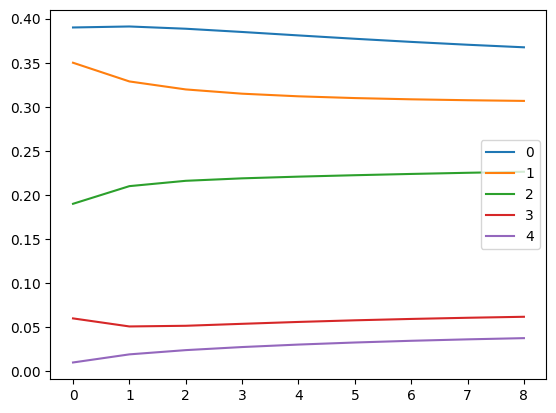

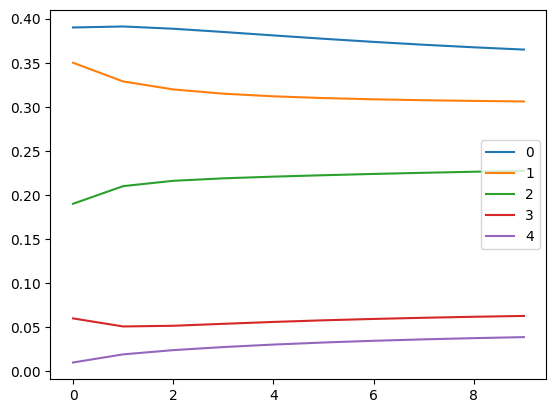

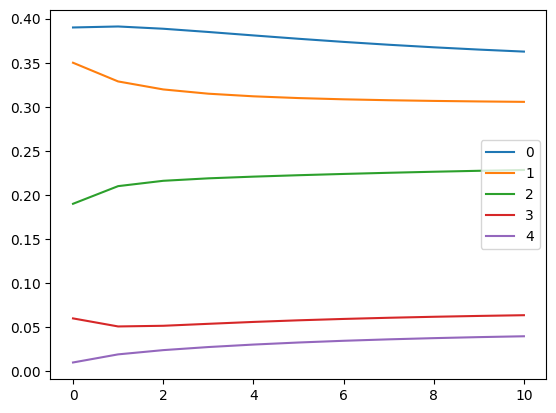

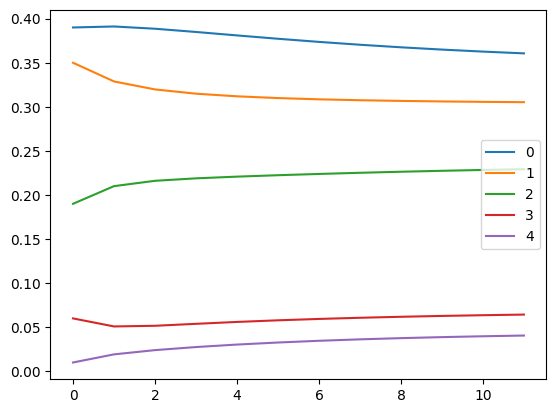

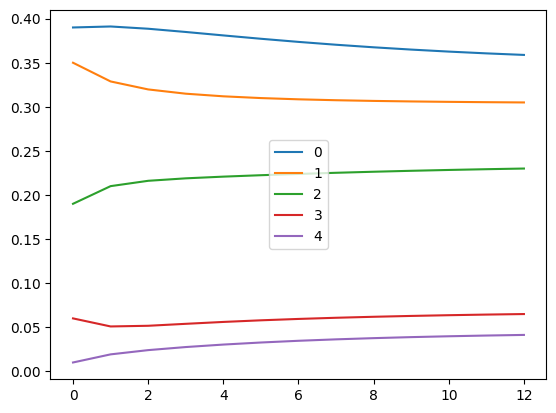

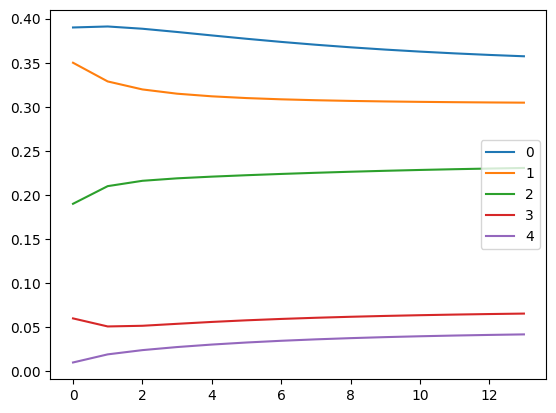

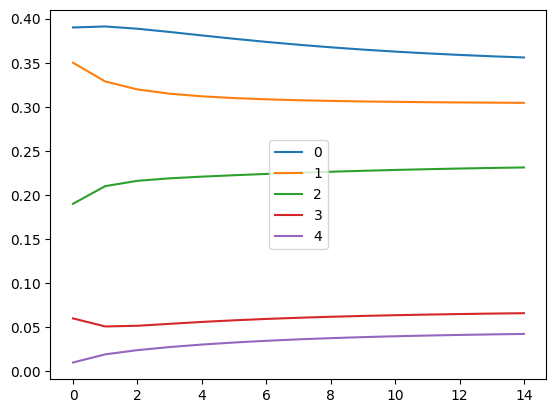

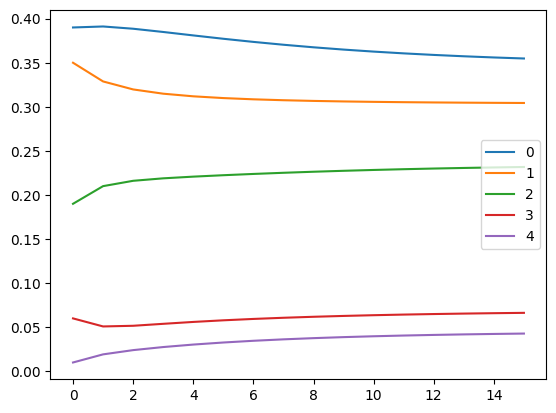

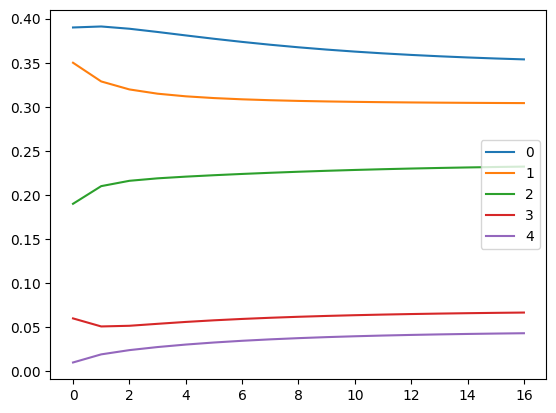

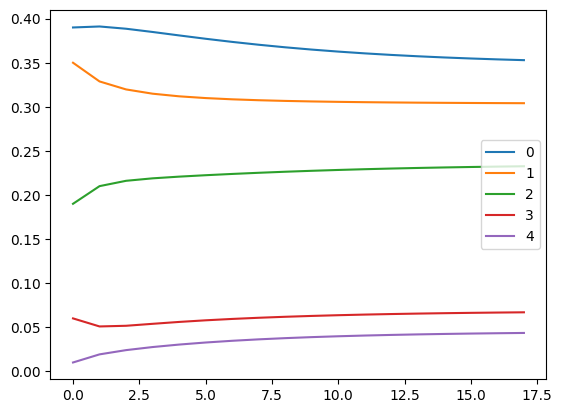

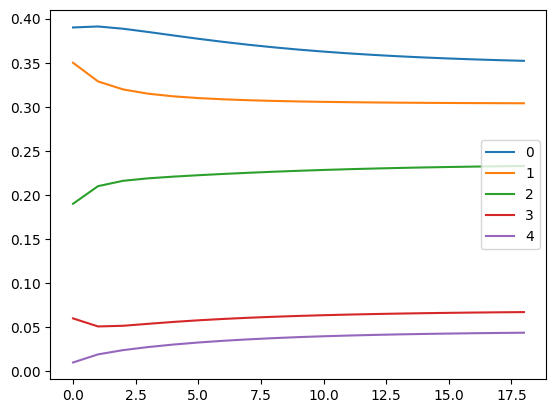

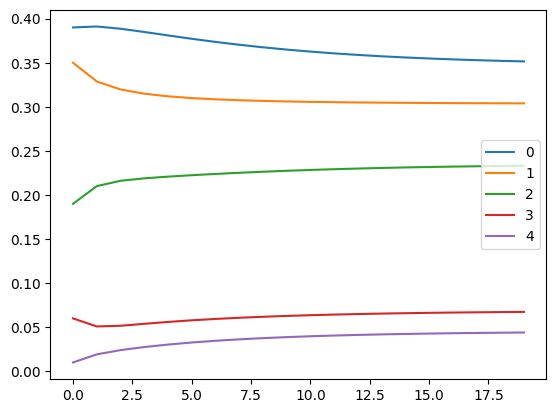

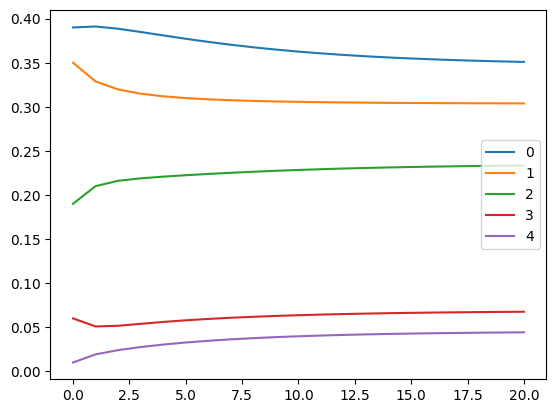

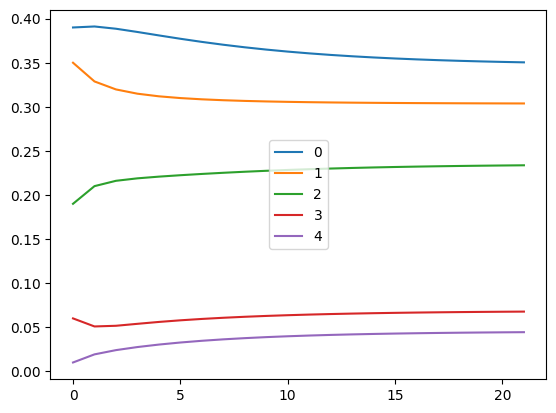

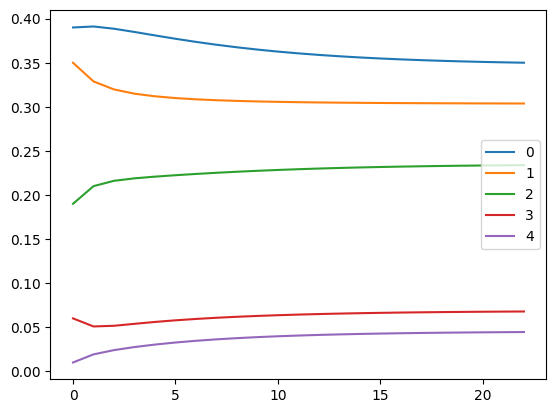

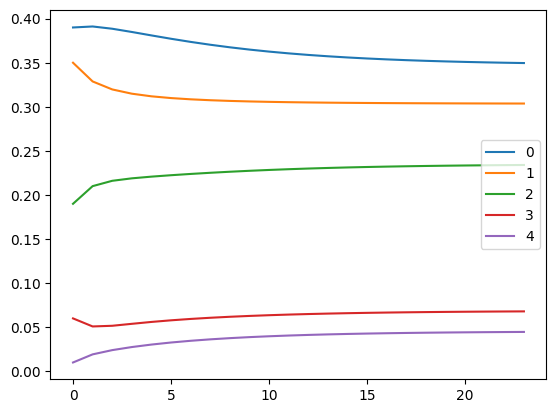

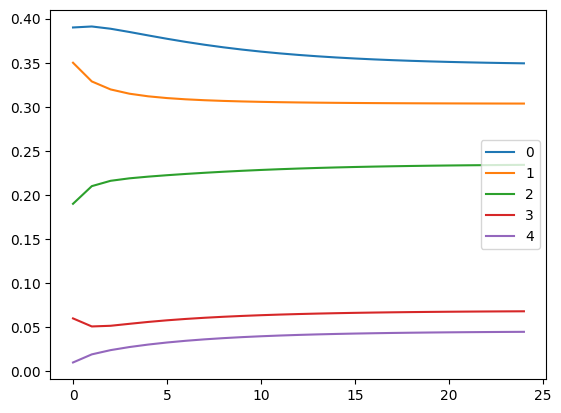

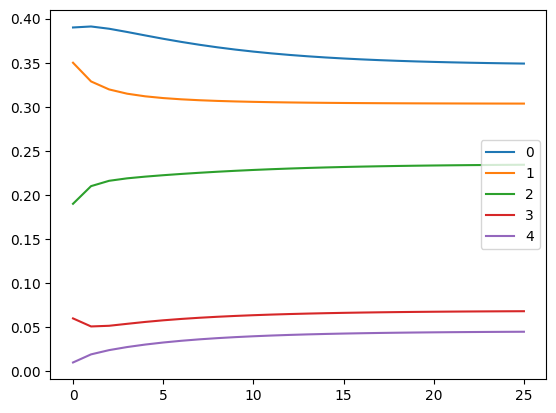

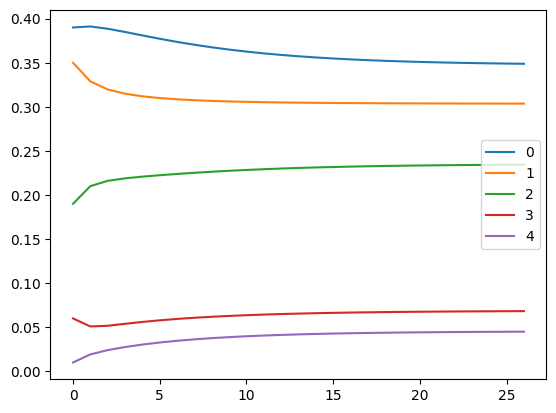

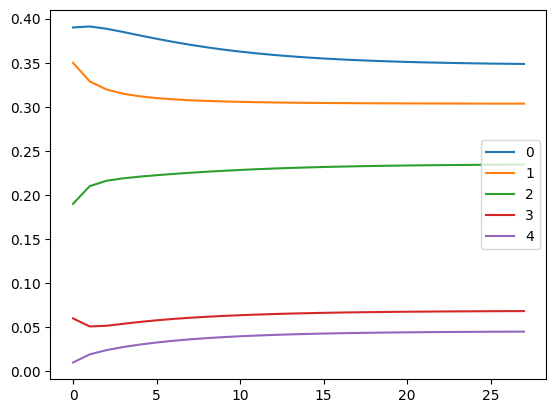

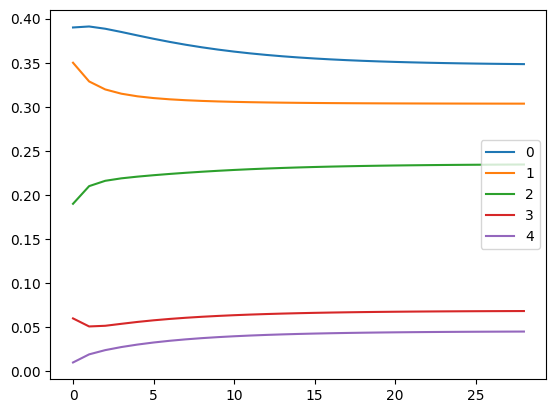

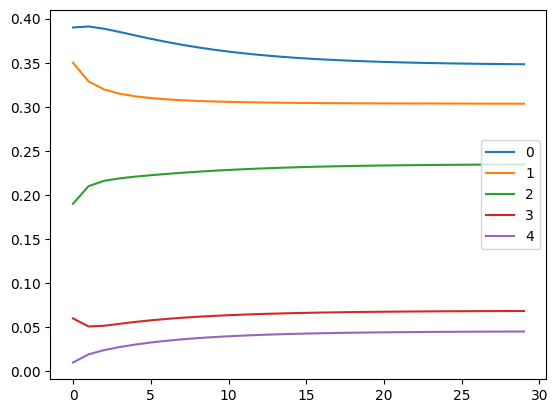

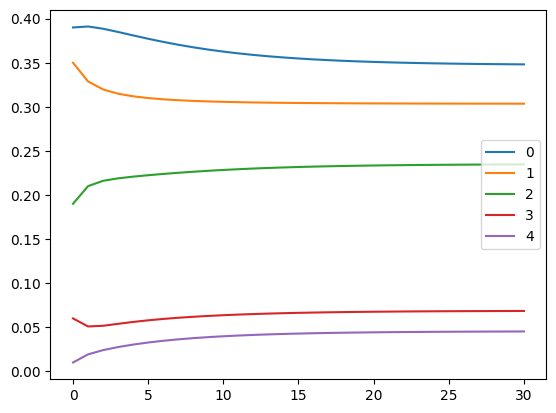

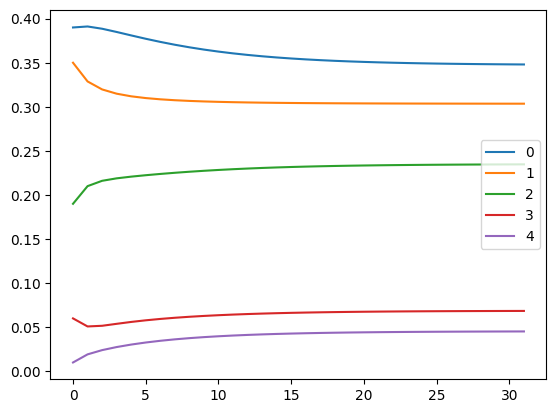

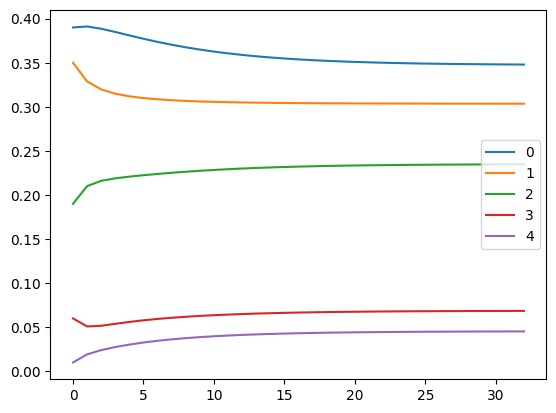

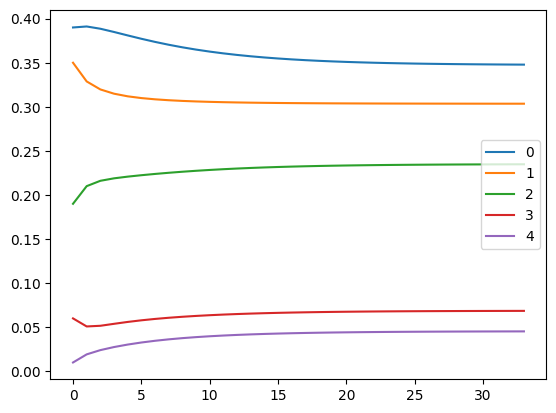

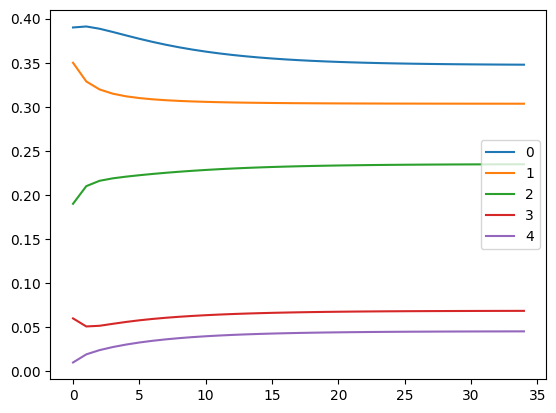

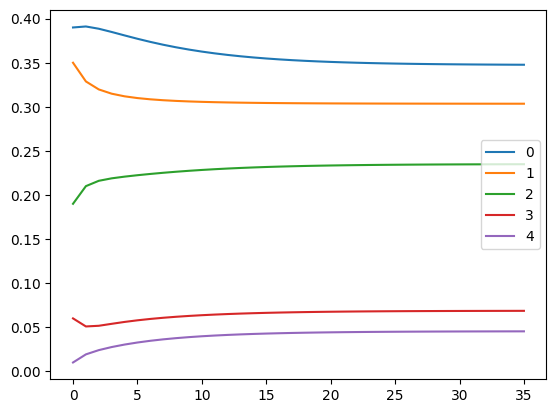

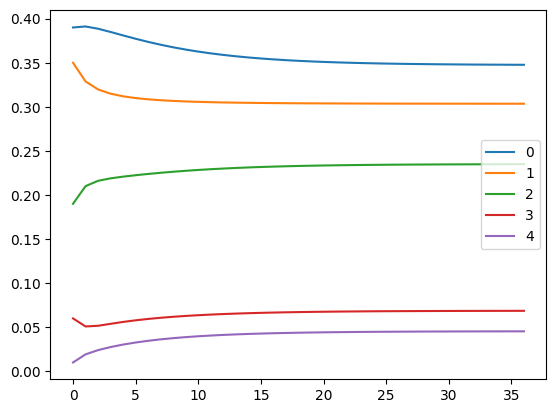

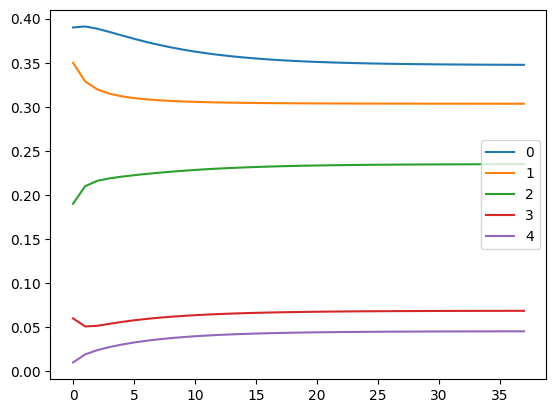

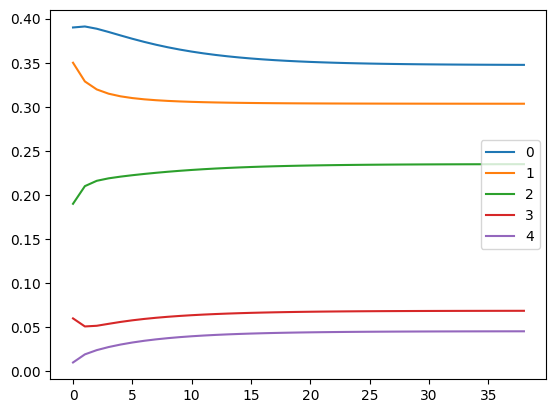

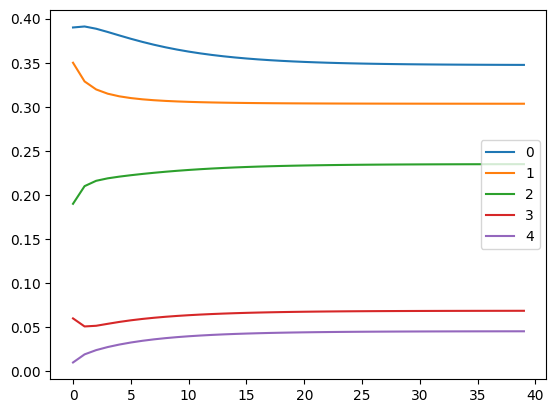

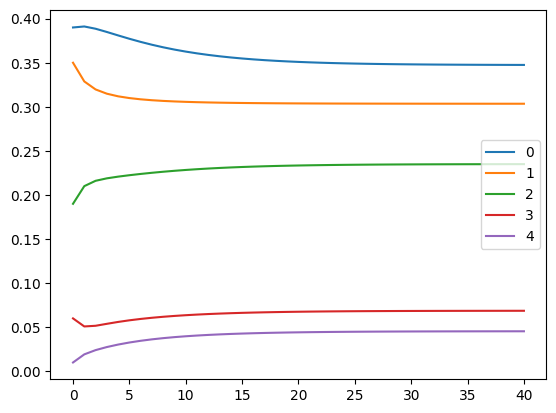

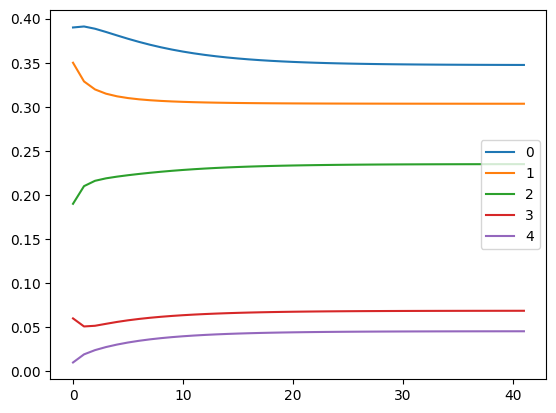

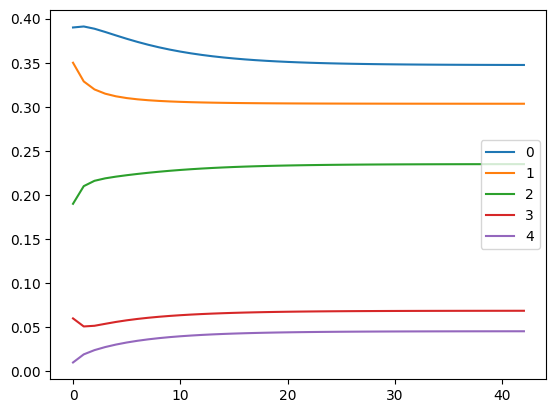

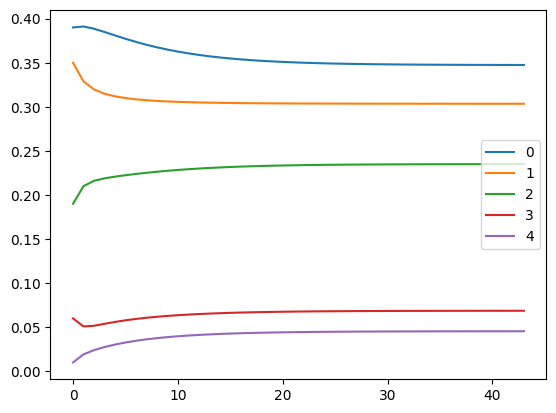

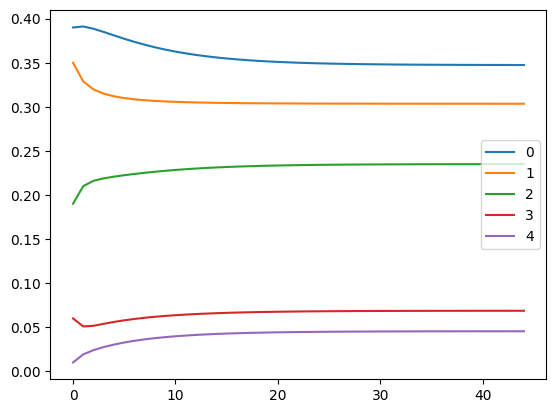

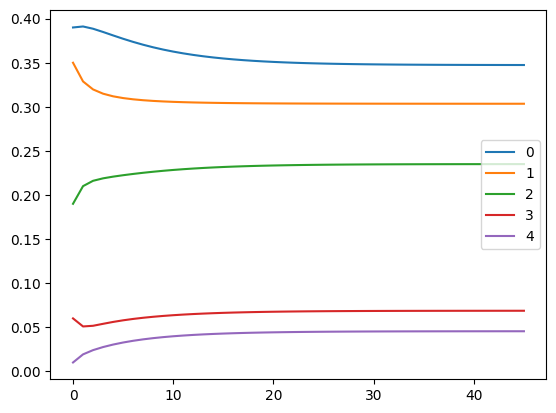

In [138]:
#Calculating stationary distribution iteratively and graphing results 

#Rows of this matrix sum to 1 so we can use eigenvalue decomposition
P = final_matrix_s

#initial state vector
state=np.array([[0.39, 0.35, 0.19, 0.06, 0.01]])
stateHist=state
dfStateHist=pd.DataFrame(state)

#for iterating for 45 intervals to represent the 45 years in our data
for x in range(45):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()

#final results
plt.show()

The values for the stationary distribution obtained in the second method converge to the values of the one calculated in the first cell of this section (stationary_distrib_s), confirming our computations as correct.

In [36]:
#End of Coding Component